
# Modelos Avanzados de Analisis de datos

 <img src="http://usblogs.pwc.com/emerging-technology/wp-content/uploads/2017/07/deep-learning-900x280.png" >

## Proyecto 1

### Modelo predictivo para Start-Up Agricola

### Deep Learning Course


Desarrollado por [Sergio Castelblanco](http://www.linkedin.com/in/sergio-castelblanco/), Jose Sandoval, Aleksey Sepulveda

Universidad de los Andes

version 2.0 , Agosto 4 2018

<h1> <center> Contenido </h1> </center> 


|                   Topics: |
|------|
| Descripcion del Problema |
| Analisis exploratorio |
| enfoque metodologico|
| Transformacion de Datos |
| Modelamiento Predictivo |
| Analisis de resultados |
| Conclusiones |

# Analisis Exploratorio

### Descripción del problema
Una start-up agricola quiere construir una aplicacion online que conecte el campo con la ciudad de manera directa y sin intermediarios. De esta manera, los agricultores ponen a la disposicion de la empresa sus distintos productos, y la start-up se encarga de atender las necesidades de demanda distribuyendo los productos hasta los clientes ﬁnales en la ciudad. Para optimizar la gestion logıstica y desarrollar esta labor de manera eﬁciente, los dueños de la start-up han visto la necesidad de diseñar e implementar un `sistema de gestion y prediccion` que les permita planear con la debida anticipacion la demanda esperada. Ası podrıan coordinar las actividades de produccion, junto con los agricultores, y atender la demanda mientras se minimizan las perdidas por unidades de producto no vendido o estropeado. Por lo tanto, la start-up agrıcola debe gestionar los inventarios de manera inteligente, disminuyendo la ventana de tiempo entre cosecha y consumo. Para ello, necesita desarrollar `modelos de prediccion` de demanda que apoyen su operacion, logrando la disponibilidad de los productos para atender a los clientes del dia siguiente, minimizando los desperdicios de alimentos e identiﬁcando habitos de consumo que le permita `optimizar` sus operaciones logısticas y de negocio.

Dicho lo anterior se debe plantear un modelo predictivo de `precio` y `demanda` para `121 productos`.

<h1> <center> Analisis Exploratorio </h1> </center> 


|                   Topics: |
|------|
| Definicion del Dataset|
| Informacion general del Dataset |
| Identificacion de valores faltantes |
| Analisis Descriptivo |
| Imputacion de datos |
| Analisis Grafico |
| Outliers Analysis |
| Analisis de Pareto |
| Series de Tiempo de Productos Pareto |


### Cargando Datos a Colab

In [1]:
!pip3 install xlrd
!pip3 install missingno
!pip3 install plotly
!pip3 install livelossplot

In [0]:

import os

if not os.path.exists('base de datos full.xlsx'):
  # Install the PyDrive wrapper & import libraries.
  # This only needs to be done once per notebook.
  !pip install -U -q PyDrive
  from pydrive.auth import GoogleAuth
  from pydrive.drive import GoogleDrive
  from google.colab import auth
  from oauth2client.client import GoogleCredentials

  # Authenticate and create the PyDrive client.
  # This only needs to be done once per notebook.
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

  # Download a file based on its file ID(Grey).
  #
  # A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
  file_id = '14HfE7WTmogPHr3ZDuLz3gZbjHaaF8nTr'
  downloaded = drive.CreateFile({'id': file_id})
  downloaded.GetContentFile(downloaded['title'])
  
  # A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
  file_id = '1GEq-3BvGu4DPOI_JHml4XLxt7rR1yTGG'
  downloaded = drive.CreateFile({'id': file_id})
  downloaded.GetContentFile(downloaded['title'])
  
   # A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
  file_id = '1_LYYLiIaKzfeYpa_49L9OcpIBdFXI7GR'
  downloaded = drive.CreateFile({'id': file_id})
  downloaded.GetContentFile(downloaded['title'])
  
   # A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
  file_id = '1x3X4WVcn6RgWID_5ldsdq6Nve9v-1GAV'
  downloaded = drive.CreateFile({'id': file_id})
  downloaded.GetContentFile(downloaded['title'])
 

In [3]:
!ls

adc.json	   data_Pedido.xlsx  Final Dataset.xlsx
data_Ingreso.xlsx  DatosAgro.txt     sample_data


### Definicion del Dataset

In [4]:
os.getcwd()

'/content'

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
plt.style.use('ggplot')

In [6]:
data = pd.read_csv("DatosAgro.txt", delimiter="\t",sep=" ", usecols=[0,1,2,3,4,5]) 
data.head(15)

Cliente       Fecha  Pedido  Precio Producto  \
0   Cliente26  18/09/2017      20     700  VER0049   
1   Cliente26  18/09/2017      10    1200  FRU0024   
2   Cliente26  18/09/2017       4    1600  VER0041   
3   Cliente26  18/09/2017      10    1500  VER0038   
4   Cliente26  18/09/2017       8    1100  VER0010   
5   Cliente26  18/09/2017      30    1000  VER0052   
6   Cliente26  18/09/2017      24    1000  TUB0012   
7    Cliente3  18/09/2017       1    4500  VER0050   
8    Cliente3  18/09/2017       1    3500  VER0043   
9    Cliente3  18/09/2017       2    1500  VER0038   
10   Cliente3  18/09/2017       2    1400  VER0028   
11   Cliente3  18/09/2017       1    1400  VER0020   
12   Cliente3  18/09/2017       2     500  VER0017   
13   Cliente3  18/09/2017       3    7000  VER0016   
14   Cliente3  18/09/2017       1    1600  VER0013   

                  Nombre_producto  
0         Yerbabuena / 100 gramos  
1            Limón Tahití / Libra  
2                  Puerro / Libra  
3           Pimentón Rojo / Libra  
4          Zucchini Verde / Libra  
5          Plátano Maduro / Libra  
6               Zanahoria / Libra  
7                  Rúgula / Libra  
8         Repollo Morado / Unidad  
9           Pimentón Rojo / Libra  
10        Lechuga Crespa / Unidad  
11               Espinaca / Libra  
12          Cilantro / 100 gramos  
13              Champiñón / Libra  
14  Cebolla Cabezona Roja / Libra

Se procede a dividir el nombre del producto y la cantidad que se encuentran en una misma columna para aprovechar al maximo la informacion del Dataset que pueda ser util para la identificacion de patrones en el modelo predictivo.

In [7]:
data["Nombre_producto"],data["Cantidad"] = data["Nombre_producto"].str.split("/",1).str
data.head()

Cliente       Fecha  Pedido  Precio Producto  Nombre_producto  \
0  Cliente26  18/09/2017      20     700  VER0049      Yerbabuena    
1  Cliente26  18/09/2017      10    1200  FRU0024    Limón Tahití    
2  Cliente26  18/09/2017       4    1600  VER0041          Puerro    
3  Cliente26  18/09/2017      10    1500  VER0038   Pimentón Rojo    
4  Cliente26  18/09/2017       8    1100  VER0010  Zucchini Verde    

      Cantidad  
0   100 gramos  
1        Libra  
2        Libra  
3        Libra  
4        Libra

Se procede a dividir el tipo de producto y su codigo que se encuentran en una misma columna para aprovechar al maximo la informacion del Dataset que pueda ser util para la identificacion de patrones en el modelo predictivo.

In [8]:
data["Tipo_Prod"],data["Cod"] = data["Producto"].str.split("0",1).str
data.head()

Cliente       Fecha  Pedido  Precio Producto  Nombre_producto  \
0  Cliente26  18/09/2017      20     700  VER0049      Yerbabuena    
1  Cliente26  18/09/2017      10    1200  FRU0024    Limón Tahití    
2  Cliente26  18/09/2017       4    1600  VER0041          Puerro    
3  Cliente26  18/09/2017      10    1500  VER0038   Pimentón Rojo    
4  Cliente26  18/09/2017       8    1100  VER0010  Zucchini Verde    

      Cantidad Tipo_Prod  Cod  
0   100 gramos       VER  049  
1        Libra       FRU  024  
2        Libra       VER  041  
3        Libra       VER  038  
4        Libra       VER  010

Se procede a dividir la fecha para separar el dia, mes y año en columnas diferentes con el objetivo de aprovechar al maximo la informacion del Dataset que pueda ser util para la identificacion de patrones en el modelo predictivo.

In [0]:
data["Dia"],data["Mes"],data["Año"] = data["Fecha"].str.split("/",2).str

In [10]:
data.head()

Cliente       Fecha  Pedido  Precio Producto  Nombre_producto  \
0  Cliente26  18/09/2017      20     700  VER0049      Yerbabuena    
1  Cliente26  18/09/2017      10    1200  FRU0024    Limón Tahití    
2  Cliente26  18/09/2017       4    1600  VER0041          Puerro    
3  Cliente26  18/09/2017      10    1500  VER0038   Pimentón Rojo    
4  Cliente26  18/09/2017       8    1100  VER0010  Zucchini Verde    

      Cantidad Tipo_Prod  Cod Dia Mes   Año  
0   100 gramos       VER  049  18  09  2017  
1        Libra       FRU  024  18  09  2017  
2        Libra       VER  041  18  09  2017  
3        Libra       VER  038  18  09  2017  
4        Libra       VER  010  18  09  2017

Posteriormente se crea una nueva variable `Ingreso` que permite entender las ventas totales y crear inferencias sobre los productos core del portafolio que deben ser foco en la estrategia de la empresa, ademas esta variable sumariza informacion tanto de las dos variables explicativas `Pedido` y `Precio`.

In [11]:
data["Ingreso"]= data["Precio"]*data["Pedido"]
data.head()

Cliente       Fecha  Pedido  Precio Producto  Nombre_producto  \
0  Cliente26  18/09/2017      20     700  VER0049      Yerbabuena    
1  Cliente26  18/09/2017      10    1200  FRU0024    Limón Tahití    
2  Cliente26  18/09/2017       4    1600  VER0041          Puerro    
3  Cliente26  18/09/2017      10    1500  VER0038   Pimentón Rojo    
4  Cliente26  18/09/2017       8    1100  VER0010  Zucchini Verde    

      Cantidad Tipo_Prod  Cod Dia Mes   Año  Ingreso  
0   100 gramos       VER  049  18  09  2017    14000  
1        Libra       FRU  024  18  09  2017    12000  
2        Libra       VER  041  18  09  2017     6400  
3        Libra       VER  038  18  09  2017    15000  
4        Libra       VER  010  18  09  2017     8800

### Informacion general del Dataset

In [12]:
print ("-----------------------------------") 
print ("Dimension del Dataset :",data.shape,"\n")
print ("-----------------------------------","\n")
print ("Informacion del Dataset:","\n")
print (data.info())
print ("-----------------------------------")

-----------------------------------
Dimension del Dataset : (4712, 13) 

----------------------------------- 

Informacion del Dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4712 entries, 0 to 4711
Data columns (total 13 columns):
Cliente            4708 non-null object
Fecha              4712 non-null object
Pedido             4712 non-null int64
Precio             4712 non-null int64
Producto           4712 non-null object
Nombre_producto    4712 non-null object
Cantidad           4705 non-null object
Tipo_Prod          4712 non-null object
Cod                4712 non-null object
Dia                4712 non-null object
Mes                4712 non-null object
Año                4712 non-null object
Ingreso            4712 non-null int64
dtypes: int64(3), object(10)
memory usage: 478.6+ KB
None
-----------------------------------


### Identificacion de Valores Faltantes

-----------------------------------
Cuantificación de valores faltantes por variable:

Cliente            4
Fecha              0
Pedido             0
Precio             0
Producto           0
Nombre_producto    0
Cantidad           7
Tipo_Prod          0
Cod                0
Dia                0
Mes                0
Año                0
Ingreso            0
dtype: int64
                                            ***************************************
                                                       Missing Value Map
                                            ***************************************


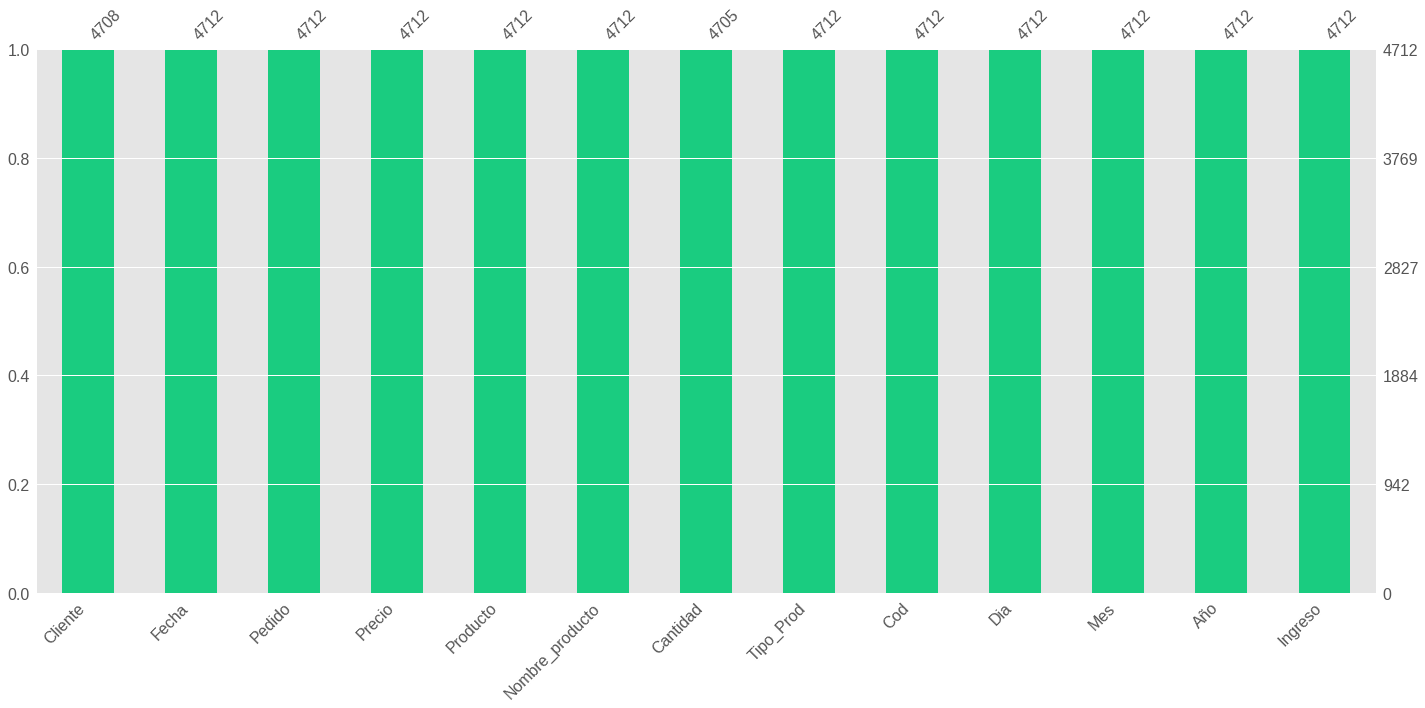

In [13]:
import missingno as msno
%matplotlib inline
print ("-----------------------------------")
print ("Cuantificación de valores faltantes por variable:""\n")
print(data.isnull().sum())
print ("                                            ***************************************")
print ("                                                       Missing Value Map")
print ("                                            ***************************************")
msno.bar(data.sample(4712),color=(0.1, 0.8, 0.5))

Los datos faltantes que se observa en el mapa corresponden a las variables `clientes` y `cantidad` donde el numero de datos faltantes son `4` y `7` respectivamente.

### Analisis descriptivo

In [13]:
data["Nombre_producto"].describe()

count               4712
unique               121
top       Tomate Chonto 
freq                 355
Name: Nombre_producto, dtype: object

El numero total de productos son `121`, el producto mas vendido es el `tomante chonto` con una frecuencia de 355 de 4712 ventas. correspondiente al 7.5% de las ventas totales.

In [14]:
data["Cliente"].describe()

count          4708
unique           33
top       Cliente32
freq            932
Name: Cliente, dtype: object

El cliente con mas cantidad de compras es el `Cliente32` con una frecuencia de `932 compras` de 4712 ventas de la compañia. correspodiente al 20% de las ventas totales.

In [15]:
print("")
print("                         Analisis Descriptivo Precio Vs Tipo producto")
data["Precio"].groupby(data["Tipo_Prod"]).describe()


                         Analisis Descriptivo Precio Vs Tipo producto


count         mean          std     min     25%     50%     75%  \
Tipo_Prod                                                                     
FRU        1843.0  2193.440043  1566.734363   640.0  1300.0  1700.0  2500.0   
GRA          57.0  4054.736842  1102.338594  1500.0  3000.0  3500.0  5160.0   
TUB         419.0  1189.856802   703.603492   400.0   800.0  1100.0  1350.0   
VER        2393.0  2072.879231  2074.115666   200.0  1000.0  1400.0  1900.0   

               max  
Tipo_Prod           
FRU        20000.0  
GRA         7000.0  
TUB         7000.0  
VER        16000.0

Se observa que los productos que tiene mas frecuencia en el Dataset son Frutas y verduras con 1843 y 2393 registros respectivamente. Por otro lado en promedio los precios mas altos estan en los granos.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


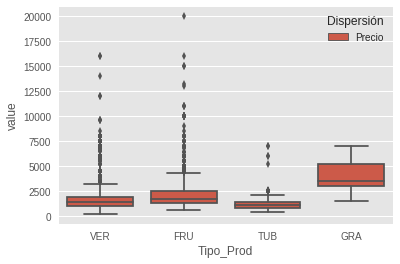

In [17]:
dp=pd.melt(data,id_vars=['Tipo_Prod'],value_vars=['Precio'],var_name='Dispersión')
sns.boxplot(x='Tipo_Prod',y='value',data=dp,hue='Dispersión')

Se observa una importante dispersión de precios en los grupos de Verduras y Frutas, mientras granos no presenta precios atípicos.


In [18]:
print("")
print("                 Analisis Descriptivo Demanda Vs Tipo producto")
data["Pedido"].groupby(data["Tipo_Prod"]).describe()


                 Analisis Descriptivo Demanda Vs Tipo producto


count      mean       std  min  25%  50%  75%    max
Tipo_Prod                                                       
FRU        1843.0  4.914270  7.901898  1.0  1.0  2.0  6.0  126.0
GRA          57.0  3.456140  2.556994  1.0  1.0  3.0  4.0   10.0
TUB         419.0  4.415274  6.166692  1.0  1.0  2.0  4.0   50.0
VER        2393.0  5.036774  7.457313  1.0  1.0  3.0  6.0  100.0

Se observa que la mayor demanda en un dia lo tiene el tipo de producto `Frutas`, adicionalmene en promedio tanto frutas como verduras tienen `5 pedidos dia`.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


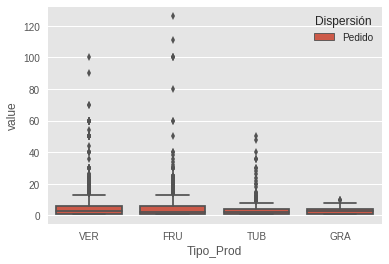

In [19]:
dd=pd.melt(data,id_vars=['Tipo_Prod'],value_vars=['Pedido'],var_name='Dispersión')
sns.boxplot(x='Tipo_Prod',y='value',data=dd,hue='Dispersión')

Se observa que existe una dispersion importante en el numero de pedidos para el caso de las verduras, frutas y tuberculos, mientras el grupo de granos es mas centrado en las cantidades demandas. 

In [20]:
print("")
print("                                        Analisis Descriptivo Ingresos Vs Tipo producto")
print("")
print("ingresos por tipo de producto:","\n","\n",data["Ingreso"].groupby(data["Tipo_Prod"]).sum())
print("")
print("ingresos Acumulados totales:","\n","\n",data["Ingreso"].cumsum())


                                        Analisis Descriptivo Ingresos Vs Tipo producto

ingresos por tipo de producto: 
 
 Tipo_Prod
FRU    15501270
GRA      710760
TUB     2199420
VER    20094870
Name: Ingreso, dtype: int64

ingresos Acumulados totales: 
 
 0          14000
1          26000
2          32400
3          47400
4          56200
5          86200
6         110200
7         114700
8         118200
9         121200
10        124000
11        125400
12        126400
13        147400
14        149000
15        155000
16        159000
17        163200
18        165100
19        168600
20        171200
21        180200
22        186700
23        194700
24        198900
25        201300
26        204600
27        210600
28        216600
29        232600
          ...   
4682    37977050
4683    37979850
4684    37987050
4685    37990570
4686    38006570
4687    38009770
4688    38010570
4689    38011850
4690    38015850
4691    38022570
4692    38025770
4693    38028570
4694    3

El tipo de producto que mas ingresos dejo son las `verduras`con `$ 20094870` seguido de las `frutas` con `$ 15501270`, adicionalmente los ingresos totales que tuvo la empresa fueron de `$38506320`.

In [21]:
print("")
print("                                        Analisis Descriptivo Total Demanda Vs Tipo producto")
print("")
print("Demanda total por tipo de producto:","\n","\n",data["Pedido"].groupby(data["Tipo_Prod"]).sum())
print("")
print("Demanda Acumulada Total:","\n","\n",data["Pedido"].cumsum())


                                        Analisis Descriptivo Total Demanda Vs Tipo producto

Demanda total por tipo de producto: 
 
 Tipo_Prod
FRU     9057
GRA      197
TUB     1850
VER    12053
Name: Pedido, dtype: int64

Demanda Acumulada Total: 
 
 0          20
1          30
2          34
3          44
4          52
5          82
6         106
7         107
8         108
9         110
10        112
11        113
12        115
13        118
14        119
15        124
16        128
17        131
18        132
19        137
20        139
21        142
22        147
23        149
24        150
25        152
26        155
27        158
28        162
29        178
        ...  
4682    22925
4683    22926
4684    22928
4685    22930
4686    22931
4687    22933
4688    22934
4689    22936
4690    22941
4691    22944
4692    22945
4693    22946
4694    22949
4695    23060
4696    23065
4697    23075
4698    23105
4699    23106
4700    23113
4701    23116
4702    23120
4703    23125
4704 

El tipo de producto que mas se vendió fueron las `verduras` con `12053 unidades` vendidas correspondiente al 52% de la demanda total, seguido de las `frutas` con `9057 unidades`, las unidades totales vendidas fueron de `23157` de todos los tipos de productos.

In [22]:
print("")
print("                                Analisis Descriptivo Precio Vs Producto")
data["Precio"].groupby(data["Nombre_producto"]).describe()


                                Analisis Descriptivo Precio Vs Producto


count          mean          std      min      25%  \
Nombre_producto                                                                
Acelga                      9.0    697.777778    84.524816    600.0    640.0   
Agraz                      10.0   9310.000000  3519.296015   6800.0   7000.0   
Aguacate Haas              30.0   2266.666667   227.934251   1600.0   2200.0   
Aguacate Papelillo         72.0   2504.166667   350.628209   2000.0   2350.0   
Ahuyama                    47.0    631.914894    71.797974    550.0    550.0   
Ajo Importado              18.0   6477.777778   495.337740   5800.0   6000.0   
Ajo Nacional                3.0   5900.000000   173.205081   5700.0   5850.0   
Ají Chirca                  2.0  18000.000000  2828.427125  16000.0  17000.0   
Ají Jalapeño                9.0   3822.222222   352.766841   3200.0   4000.0   
Ají Rocoto                  3.0   3033.333333   404.145188   2800.0   2800.0   
Albahaca                   35.0    700.000000   316.227766    500.0    500.0   
Alcachofa                  12.0   3250.000000   231.595258   3000.0   3100.0   
Apio                       67.0   1283.582090   232.637717    800.0   1100.0   
Arracacha                   1.0   2500.000000          NaN   2500.0   2500.0   
Arracacha                  55.0   1212.727273   419.459328   1000.0   1000.0   
Arveja Desgranada          25.0   5156.800000   616.594951   4300.0   5000.0   
Banano Bocadillo           11.0   2014.545455   435.347301   1400.0   1780.0   
Banano Criollo             95.0   1191.578947   173.611916    800.0   1100.0   
Berenjena                 129.0   1438.759690   192.479738   1120.0   1200.0   
Berro                       8.0    562.500000   315.945294    200.0    200.0   
Breva                       4.0   4400.000000     0.000000   4400.0   4400.0   
Brócoli                    67.0   1873.731343   155.668994   1700.0   1700.0   
Calabacín                   5.0    600.000000     0.000000    600.0    600.0   
Carambolo                  13.0   3484.615385   695.037354   2500.0   3000.0   
Cebolla Cabezona Blanca    85.0   1476.941176   331.483044   1000.0   1200.0   
Cebolla Cabezona Roja     143.0   1523.076923   399.945825   1000.0   1000.0   
Cebolla Larga              86.0   1270.930233   112.580720   1200.0   1200.0   
Cebollín                   10.0   3110.000000  1808.897761   1500.0   1700.0   
Champiñón                 204.0   7381.372549   591.438156   5600.0   7000.0   
Chontaduro                  1.0   3920.000000          NaN   3920.0   3920.0   
...                         ...           ...          ...      ...      ...   
Pimentón Verde              5.0   1540.000000   219.089023   1300.0   1300.0   
Pitaya                      9.0   6888.888889  2368.778401   5000.0   5000.0   
Piña Cayena Lisa            3.0   1066.666667   369.504172    640.0    960.0   
Piña Golden Sweet          83.0   3529.879518  1143.620155   2640.0   3000.0   
Plátano Maduro             57.0   1126.315789   154.140840   1000.0   1000.0   
Plátano Verde              19.0   1278.947368   241.704474   1000.0   1200.0   
Puerro                     20.0   1600.000000     0.000000   1600.0   1600.0   
Remolacha                  34.0    788.235294   318.866084    400.0    600.0   
Repollo Blanco              7.0    900.000000   597.215762    400.0    650.0   
Repollo Morado             34.0   1952.941176  1133.574474    500.0    800.0   
Romero                      4.0    737.500000   175.000000    650.0    650.0   
Rábano Rojo                24.0   1929.166667   332.943613   1500.0   1600.0   
Rúgula                     59.0   3140.677966  1877.555146   1100.0   1500.0   
Tomate Cherry              39.0   3784.615385   478.780502   2800.0   3500.0   
Tomate Chonto             355.0   1497.323944   230.296773   1100.0   1400.0   
Tomate Larga Vida          67.0   1494.029851   209.530931   1100.0   1400.0   
Tomate de Árbol             9.0   1466.666667   100.000000   1400.0   1400.0   
Tomillo                   

In [23]:
print("")
print("                                        Analisis Descriptivo Demanda Vs Producto")
data["Pedido"].groupby(data["Nombre_producto"]).describe()


                                        Analisis Descriptivo Demanda Vs Producto


count       mean        std   min    25%   50%  \
Nombre_producto                                                            
Acelga                      9.0   2.888889   2.848001   1.0   1.00   2.0   
Agraz                      10.0   2.200000   2.780887   1.0   1.00   1.0   
Aguacate Haas              30.0  10.000000  26.148119   1.0   1.25   2.0   
Aguacate Papelillo         72.0   3.180556   1.706049   1.0   2.00   3.0   
Ahuyama                    47.0   5.765957   9.842704   1.0   2.00   4.0   
Ajo Importado              18.0   1.111111   0.471405   1.0   1.00   1.0   
Ajo Nacional                3.0   1.333333   0.577350   1.0   1.00   1.0   
Ají Chirca                  2.0   1.000000   0.000000   1.0   1.00   1.0   
Ají Jalapeño                9.0   2.222222   2.990726   1.0   1.00   1.0   
Ají Rocoto                  3.0   4.000000   5.196152   1.0   1.00   1.0   
Albahaca                   35.0   2.685714   1.622841   1.0   1.00   2.0   
Alcachofa                  12.0   2.166667   0.834847   1.0   2.00   2.0   
Apio                       67.0   1.731343   1.108946   1.0   1.00   1.0   
Arracacha                   1.0  10.000000        NaN  10.0  10.00  10.0   
Arracacha                  55.0   1.636364   0.889520   1.0   1.00   1.0   
Arveja Desgranada          25.0   1.680000   0.802081   1.0   1.00   1.0   
Banano Bocadillo           11.0   1.545455   0.687552   1.0   1.00   1.0   
Banano Criollo             95.0   5.452632   5.236469   1.0   2.00   4.0   
Berenjena                 129.0   5.193798   2.883351   1.0   4.00   4.0   
Berro                       8.0   2.625000   2.065879   1.0   1.00   1.5   
Breva                       4.0  26.250000  49.175705   1.0   1.00   2.0   
Brócoli                    67.0   2.358209   1.494449   1.0   1.00   2.0   
Calabacín                   5.0   1.800000   1.095445   1.0   1.00   1.0   
Carambolo                  13.0   1.384615   0.506370   1.0   1.00   1.0   
Cebolla Cabezona Blanca    85.0  10.282353  18.765224   1.0   1.00   2.0   
Cebolla Cabezona Roja     143.0   6.000000   5.451450   1.0   3.00   5.0   
Cebolla Larga              86.0   2.302326   2.502092   1.0   1.00   1.0   
Cebollín                   10.0   2.000000   2.494438   1.0   1.00   1.0   
Champiñón                 204.0   2.681373   1.256097   1.0   2.00   3.0   
Chontaduro                  1.0   3.000000        NaN   3.0   3.00   3.0   
...                         ...        ...        ...   ...    ...   ...   
Pimentón Verde              5.0   8.400000   6.580274   1.0   2.00  10.0   
Pitaya                      9.0   1.888889   0.333333   1.0   2.00   2.0   
Piña Cayena Lisa            3.0   1.666667   0.577350   1.0   1.50   2.0   
Piña Golden Sweet          83.0   1.325301   0.645971   1.0   1.00   1.0   
Plátano Maduro             57.0  18.666667  24.065634   1.0   3.00   8.0   
Plátano Verde              19.0   3.052632   3.008759   1.0   2.00   2.0   
Puerro                     20.0   4.450000   3.804084   1.0   1.00   4.0   
Remolacha                  34.0   1.764706   1.046171   1.0   1.00   1.0   
Repollo Blanco              7.0  11.428571  13.049357   2.0   4.00  10.0   
Repollo Morado             34.0   2.088235   2.274598   1.0   1.00   2.0   
Romero                      4.0   3.000000   2.309401   1.0   1.00   3.0   
Rábano Rojo                24.0   2.250000   3.881394   1.0   1.00   1.0   
Rúgula                     59.0   3.186441   3.115449   1.0   1.00   2.0   
Tomate Cherry              39.0   1.717949   0.887003   1.0   1.00   2.0   
Tomate Chonto             355.0  11.267606  10.345388   1.0   8.00   9.0   
Tomate Larga Vida          67.0   7.029851   6.468971   1.0   2.00   4.0   
Tomate de Árbol             9.0   3.000000   1.870829   1.0   2.00   2.0   
Tomillo                     6.0   2.166667   1.602082   1.0   1.00   1.5   
Toronjil                    1.0   1.000000        NaN   1.0   1.00   1.0   
Uchuva                     12.0   2.000000   0.852803   1.0   1.75   2.0  

In [24]:
print("")
print("                                        Analisis Descriptivo Ingresos Vs Producto")
print("")
print("Ingresos totales por Producto:","\n","\n",data["Ingreso"].groupby(data["Nombre_producto"]).sum().sort_values(ascending= False))


                                        Analisis Descriptivo Ingresos Vs Producto

Ingresos totales por Producto: 
 
 Nombre_producto
Tomate Chonto               5981700
Champiñón                   4029800
Pimentón Rojo               2203150
Lechuga Crespa              1718400
Zucchini Verde              1628100
Cebolla Cabezona Roja       1352800
Pepino Cohombro             1311030
Cebolla Cabezona Blanca     1202220
Plátano Maduro              1132900
Zanahoria                   1125600
Limón Tahití                1035500
Berenjena                    973400
Perejil Crespo               917200
Tomate Larga Vida            719200
Aguacate Haas                600000
Banano Criollo               591600
Aguacate Papelillo           579900
Mazorca Desgranada           482000
Fresa Pareja                 463200
Breva                        462000
Rúgula                       384400
Piña Golden Sweet            376480
Perejil Liso                 363900
Mora Castilla                345150
M

El producto que mas ingresos genero fue el `tomante chonto` `$5981700`, seguido del `Champiñon`  `$4029800` y `Pimenton Rojo`  `$2203150`.

In [25]:
print("")
print("                                        Analisis Descriptivo Total Demanda Vs Producto")
print("")
print("Demanda total por Producto:","\n","\n",data["Pedido"].groupby(data["Nombre_producto"]).sum().sort_values(ascending= False))


                                        Analisis Descriptivo Total Demanda Vs Producto

Demanda total por Producto: 
 
 Nombre_producto
Tomate Chonto               4000
Pepino Cohombro             1360
Pimentón Rojo               1324
Zucchini Verde              1211
Lechuga Crespa              1094
Plátano Maduro              1064
Zanahoria                    961
Cebolla Cabezona Blanca      874
Cebolla Cabezona Roja        858
Limón Tahití                 802
Berenjena                    670
Champiñón                    547
Banano Criollo               518
Tomate Larga Vida            471
Perejil Liso                 400
Aguacate Haas                300
Ahuyama                      271
Naranja Sweety               270
Fresa Pareja                 255
Aguacate Papelillo           229
Yerbabuena                   221
Cilantro                     220
Cebolla Larga                198
Papa Criolla                 197
Rúgula                       188
Mango Tommy Atkins           178
Mora 

el producto con mayor demanda fue el `tomante chonto` con `4000 unidades` totales vendidas, correspondiente al `17%` de la demanda total y al `44%` de la demanda total de frutas , seguido del `pepino cohombro` con `1360 unidades`.

In [26]:
print("")
print("                                  Analisis Descriptivo Cliente Vs Producto-Tipo producto")
data.groupby('Cliente')['Nombre_producto',"Tipo_Prod",].nunique().describe()


                                  Analisis Descriptivo Cliente Vs Producto-Tipo producto


Nombre_producto  Tipo_Prod
count        33.000000  33.000000
mean         28.272727   3.272727
std          18.327358   0.674200
min           4.000000   2.000000
25%          16.000000   3.000000
50%          20.000000   3.000000
75%          44.000000   4.000000
max          66.000000   4.000000

Los clientes compraron en promedio `28 productos` un maximo de 66 productos y un minimo de 4 productos, asi mismo en promedio lo clientes compraron 3 tipos de productos minimo 2 y cerca del 75% de los clientes compraron los 4 tipos de producto `Verduras`, `Frutas`, `Tuberculos` y `Granos`.

In [27]:
print("")
print("                                         Analisis Descriptivo Precio Vs Cliente")
data["Precio"].groupby(data["Cliente"]).describe()


                                         Analisis Descriptivo Precio Vs Cliente


count         mean          std    min     25%     50%     75%  \
Cliente                                                                     
Cliente1    37.0  2357.567568  1747.015559  680.0  1100.0  1600.0  3500.0   
Cliente10  193.0  2530.000000  2307.752559  400.0  1200.0  1700.0  2600.0   
Cliente11   32.0  2206.250000  1841.447099  900.0  1100.0  1350.0  2625.0   
Cliente12   49.0  2846.530612  3019.117939  400.0  1200.0  1600.0  3500.0   
Cliente13  168.0  1480.059524   799.590836  400.0   900.0  1400.0  1800.0   
Cliente14   68.0  2005.588235  1566.356531  400.0  1075.0  1300.0  2510.0   
Cliente15   30.0  2266.666667  1835.912501  400.0  1200.0  1900.0  2500.0   
Cliente16  193.0  2470.103627  2039.383074  400.0  1200.0  1600.0  3200.0   
Cliente17    9.0  3840.000000  4656.006873  800.0  1600.0  2800.0  3200.0   
Cliente18   18.0  1988.888889  1578.043796  500.0  1130.0  1350.0  2120.0   
Cliente19  184.0  1573.641304  1305.902239  300.0   975.0  1300.0  1600.0   
Cliente2   182.0  2253.241758  1780.923448  200.0  1200.0  1700.0  2500.0   
Cliente20   85.0  1696.470588  1465.958735  500.0  1100.0  1300.0  1900.0   
Cliente21  584.0  1861.472603  1486.155743  200.0  1100.0  1500.0  2100.0   
Cliente22  169.0  2486.331361  2079.883704  200.0  1200.0  1850.0  3000.0   
Cliente23   22.0  1450.000000   542.041995  650.0   950.0  1450.0  1800.0   
Cliente24   44.0  2087.500000  1918.002989  400.0  1100.0  1350.0  1975.0   
Cliente25   15.0  1687.333333   752.656881  560.0  1110.0  1850.0  2220.0   
Cliente26  153.0  1303.594771   597.337970  500.0  1100.0  1200.0  1500.0   
Cliente27   19.0  3591.052632  4544.174408  600.0  1520.0  2100.0  3000.0   
Cliente28   70.0  1931.000000  1318.345637  400.0  1125.0  1620.0  2175.0   
Cliente29  862.0  2764.907193  2255.372150  500.0  1400.0  1700.0  3000.0   
Cliente3   411.0  1881.508516  1464.185834  500.0  1000.0  1400.0  2000.0   
Cliente30   28.0  2471.428571  1734.575867  500.0  1250.0  2100.0  3200.0   
Cliente31    4.0  1375.000000   967.384791  500.0   575.0  1300.0  2100.0   
Cliente32  932.0  1610.922747  1375.232353  450.0  1100.0  1300.0  1600.0   
Cliente33    7.0  2900.000000  2538.372182  800.0   800.0  1500.0  4700.0   
Cliente4    35.0  1525.714286   763.926720  650.0   850.0  1500.0  2000.0   
Cliente5    20.0  2832.500000  2942.531805  700.0  1462.5  1650.0  2625.0   
Cliente6    44.0  2232.500000  2352.838093  600.0  1200.0  1750.0  2500.0   
Cliente7    22.0  1567.272727  1150.458219  500.0   667.5  1450.0  1830.0   
Cliente8     5.0  1270.000000   616.035713  700.0   750.0  1200.0  1500.0   
Cliente9    14.0  2555.714286  2470.828931  800.0  1220.0  1600.0  2650.0   

               max  
Cliente             
Cliente1    8000.0  
Cliente10  11000.0  
Cliente11   7500.0  
Cliente12  15000.0  
Cliente13   4500.0  
Cliente14   7000.0  
Cliente15   7000.0  
Cliente16  10000.0  
Cliente17  16000.0  
Cliente18   6000.0  
Cliente19   8000.0  
Cliente2   13200.0  
Cliente20  10000.0  
Cliente21  12000.0  
Cliente22  15000.0  
Cliente23   2100.0  
Cliente24   7000.0  
Cliente25   3200.0  
Cliente26   5800.0  
Cliente27  20000.0  
Cliente28   6000.0  
Cliente29   8000.0  
Cliente3    7000.0  
Cliente30   6800.0  
Cliente31   2400.0  
Cliente32  16000.0  
Cliente33   7000.0  
Cliente4    3500.0  
Cliente5   13000.0  
Cliente6   16000.0  
Cliente7    5600.0  
Cliente8    2200.0  
Cliente9    9600.0

In [28]:
print("El mayor precio de los productos es = " + str(data.Precio.max()))
print("El precio promedio de los productos es = " + str(data.Precio.mean()))
print("El menor precio de los productos es = " + str(data.Precio.min()))

El mayor precio de los productos es = 20000
El precio promedio de los productos es = 2065.4881154499153
El menor precio de los productos es = 200


Se organiza la base de datos para conocer el producto con mayor precio.

In [29]:
data.sort_values("Precio", ascending= False).head()

Cliente       Fecha  Pedido  Precio Producto  Nombre_producto  \
4699  Cliente27  17/11/2016       1   20000  FRU0004       Ají Chirca   
3327   Cliente6  07/02/2017       1   16000  VER0019       Esparrago    
4686  Cliente17  18/11/2016       1   16000  FRU0004       Ají Chirca   
4675  Cliente32  20/11/2016       1   16000  VER0051  Perejil Crespo    
4125  Cliente12  13/12/2016       1   15000  FRU0001           Agraz    

         Cantidad Tipo_Prod  Cod Dia Mes   Año  Ingreso  
4699          NaN       FRU  004  17  11  2016    20000  
3327        Libra       VER  019  07  02  2017    16000  
4686          NaN       FRU  004  18  11  2016    16000  
4675   100 gramos       VER  051  20  11  2016    16000  
4125        Libra       FRU  001  13  12  2016    15000

el producto mas costoso del dataset es `Ají Chirca` con un precio de `20000` seguido de `Esparrago`,`Perejil Crespo` con precios de `16000`.

In [30]:
print("")
print("                                  Analisis Descriptivo Ingresos Vs Cliente-Tipo producto")
print("")
print("Ingresos totales por clientes-Tipo Producto:","\n","\n",data["Ingreso"].groupby([data["Cliente"],data["Tipo_Prod"]]).sum())
print("")
print("Ingresos totales por clientes:","\n","\n",data["Ingreso"].groupby(data["Cliente"]).sum().sort_values(ascending= False))


                                  Analisis Descriptivo Ingresos Vs Cliente-Tipo producto

Ingresos totales por clientes-Tipo Producto: 
 
 Cliente    Tipo_Prod
Cliente1   FRU           114030
           TUB              900
           VER            14500
Cliente10  FRU           603330
           GRA            19000
           TUB            72300
           VER           259000
Cliente11  FRU           151800
           GRA           138500
           VER            18700
Cliente12  FRU           107360
           GRA            15480
           TUB            20540
           VER            72860
Cliente13  FRU           369050
           TUB            62500
           VER           199550
Cliente14  FRU           203120
           GRA             5160
           TUB            32420
           VER            69940
Cliente15  FRU           168400
           TUB             1500
           VER            71600
Cliente16  FRU          1218280
           GRA            14200
       

El cliente que mas compro fue el `cliente32` con `$ 9762040` seguido del `cliente29`con `$7536400`.

In [31]:
print("")
print("                                  Analisis Descriptivo Demanda Vs Cliente-Tipo producto")
data["Pedido"].groupby([data["Cliente"],data["Tipo_Prod"]]).describe()


                                  Analisis Descriptivo Demanda Vs Cliente-Tipo producto


count       mean        std  min    25%   50%    75%  \
Cliente   Tipo_Prod                                                         
Cliente1  FRU         31.0   2.161290   1.916538  1.0   1.00   1.0   2.00   
          TUB          1.0   1.000000        NaN  1.0   1.00   1.0   1.00   
          VER          5.0   1.000000   0.000000  1.0   1.00   1.0   1.00   
Cliente10 FRU         87.0   3.172414   3.217709  1.0   2.00   2.0   3.00   
          GRA          2.0   2.000000   0.000000  2.0   2.00   2.0   2.00   
          TUB         32.0   1.781250   0.750672  1.0   1.00   2.0   2.00   
          VER         72.0   1.791667   0.933530  1.0   1.00   2.0   2.00   
Cliente11 FRU         23.0   4.782609   4.879983  1.0   2.00   3.0   5.50   
          GRA          5.0   8.200000   1.788854  6.0   7.00   8.0  10.00   
          VER          4.0   4.250000   2.362908  1.0   3.25   5.0   6.00   
Cliente12 FRU         17.0   2.058824   1.297622  1.0   1.00   2.0   3.00   
          GRA          2.0   1.500000   0.707107  1.0   1.25   1.5   1.75   
          TUB          8.0   1.500000   0.755929  1.0   1.00   1.0   2.00   
          VER         22.0   1.636364   0.726731  1.0   1.00   1.5   2.00   
Cliente13 FRU         74.0   3.567568   3.149608  1.0   1.00   2.0   5.00   
          TUB         23.0   2.086957   1.831866  1.0   1.00   1.0   2.00   
          VER         71.0   2.112676   1.336833  1.0   1.00   2.0   2.50   
Cliente14 FRU         31.0   4.709677   5.945270  1.0   1.00   3.0   4.50   
          GRA          1.0   1.000000        NaN  1.0   1.00   1.0   1.00   
          TUB         11.0   2.909091   1.221028  2.0   2.00   3.0   3.00   
          VER         25.0   1.680000   1.029563  1.0   1.00   2.0   2.00   
Cliente15 FRU         13.0   6.769231   5.629592  1.0   2.00   6.0   9.00   
          TUB          1.0   1.000000        NaN  1.0   1.00   1.0   1.00   
          VER         16.0   4.437500   7.023473  1.0   1.00   2.0   4.25   
Cliente16 FRU         95.0   4.694737  14.236658  1.0   1.00   2.0   3.00   
          GRA          2.0   2.000000   1.414214  1.0   1.50   2.0   2.50   
          TUB         27.0   1.925926   1.685365  1.0   1.00   2.0   2.00   
          VER         69.0   1.695652   0.772779  1.0   1.00   2.0   2.00   
Cliente17 FRU          5.0   1.600000   0.547723  1.0   1.00   2.0   2.00   
          GRA          1.0   2.000000        NaN  2.0   2.00   2.0   2.00   
...                    ...        ...        ...  ...    ...   ...    ...   
Cliente3  TUB         74.0   2.797297   1.638407  1.0   1.00   3.0   4.00   
          VER        222.0   2.189189   1.394972  1.0   1.00   2.0   3.00   
Cliente30 FRU         20.0  16.450000  32.066502  1.0   1.00   3.0  10.00   
          TUB          2.0   1.500000   0.707107  1.0   1.25   1.5   1.75   
          VER          6.0   3.166667   3.710346  1.0   1.00   1.0   4.00   
Cliente31 FRU          2.0   6.500000   6.363961  2.0   4.25   6.5   8.75   
          VER          2.0   2.500000   0.707107  2.0   2.25   2.5   2.75   
Cliente32 FRU        234.0   9.414530  10.249001  1.0   3.00   9.0  12.00   
          TUB         26.0   3.923077   1.741794  2.0   3.00   4.0   5.00   
          VER        672.0   6.510417   6.235078  1.0   2.00   5.0   9.00   
Cliente33 FRU          2.0   2.000000   1.414214  1.0   1.50   2.0   2.50   
          TUB          3.0   3.000000   0.000000  3.0   3.00   3.0   3.00   
          VER          2.0   2.500000   0.707107  2.0   2.25   2.5   2.75   
Cliente4  FRU         16.0   2.062500   1.982213  1.0   1.00   1.0   2.00   
          TUB          2.0   5.000000   0.000000  5.0   5.00   5.0   5.00   
          VER         17.0   5.529412   9.361608  1.0   1.00   2.0   5.00   
Cliente5  FRU         12.0   1.583333   0.792961  1.0   1.00   1.0   2.00   
          GRA          1.0   1.000000        NaN  1.0   1.00   1.0   1.00   
          VER          7.0   1.428571   0.534522  1.0   1.00   1.0   2.00   
Cliente6  FRU    

In [32]:
print("El mayor pedido de los productos es = " + str(data.Pedido.max()))
print("El pedido promedio de los productos es = " + str(data.Pedido.mean()))
print("El menor pedido de los productos es = " + str(data.Pedido.min()))

El mayor pedido de los productos es = 126
El pedido promedio de los productos es = 4.9144736842105265
El menor pedido de los productos es = 1


In [33]:
print("")
print("                                  Analisis Descriptivo Demanda Vs Cliente-Tipo producto")
print("")
print("Demanda total por clientes-Tipo Producto:","\n","\n",data["Pedido"].groupby([data["Cliente"],data["Tipo_Prod"]]).sum())
print("")
print("Demanda total por clientes:","\n","\n",data["Pedido"].groupby(data["Cliente"]).sum().sort_values(ascending= False))


                                  Analisis Descriptivo Demanda Vs Cliente-Tipo producto

Demanda total por clientes-Tipo Producto: 
 
 Cliente    Tipo_Prod
Cliente1   FRU            67
           TUB             1
           VER             5
Cliente10  FRU           276
           GRA             4
           TUB            57
           VER           129
Cliente11  FRU           110
           GRA            41
           VER            17
Cliente12  FRU            35
           GRA             3
           TUB            12
           VER            36
Cliente13  FRU           264
           TUB            48
           VER           150
Cliente14  FRU           146
           GRA             1
           TUB            32
           VER            42
Cliente15  FRU            88
           TUB             1
           VER            71
Cliente16  FRU           446
           GRA             4
           TUB            52
           VER           117
Cliente17  FRU             8
  

el cliente que mas compro en numero de unidades fue el `cliente32` con `6680 unidades` de las cuales el `65%` corresponden a `Verduras`, seguido del `cliente29` con `3188 unidades`, estos dos clientes fueron los que mas ingresos dejaron a la compañia.

### Imputacion de datos 

De acuerdo al analisis de valores faltantes realizado anteriormente se observa que la columna clientes tiene 4 observaciones con valor NA, por lo tanto se propone reemplazar estos valores validando el producto asociado a la observacion faltante en la columna cliente dada la frecuencia de compra de estos productos por cada cliente.

Con el objetivo de reemplazar los valores faltantes de clientes se identifica la frecuencia de compra asociada de cada producto por cliente.

In [34]:
print("")
print("                                  Analisis Descriptivo Demanda Cebolla Cabezona Blanca Vs Cliente")
print("")
print("Demanda total clientes-Tipo Producto:","\n","\n",data["Pedido"].groupby([data["Cliente"],data["Nombre_producto"]]).sum().sort_values(ascending= False))
print("")


                                  Analisis Descriptivo Demanda Cebolla Cabezona Blanca Vs Cliente

Demanda total clientes-Tipo Producto: 
 
 Cliente    Nombre_producto         
Cliente32  Tomate Chonto               1698
Cliente29  Tomate Chonto               1062
Cliente32  Pepino Cohombro             1056
Cliente29  Lechuga Crespa               966
Cliente26  Plátano Maduro               826
Cliente32  Pimentón Rojo                783
           Zucchini Verde               771
Cliente26  Cebolla Cabezona Blanca      686
Cliente32  Berenjena                    551
Cliente26  Zanahoria                    426
Cliente32  Cebolla Cabezona Roja        422
           Limón Tahití                 408
Cliente29  Champiñón                    391
Cliente32  Perejil Liso                 331
Cliente23  Tomate Chonto                320
Cliente26  Pimentón Rojo                315
Cliente21  Tomate Chonto                286
           Banano Criollo               214
Cliente26  Tomate Larga Vida  

Para el caso del `tomate chonto` se encuentra que el cliente con mayor frecuencia de compra es el `cliente32`, por lo tanto este tiene mayores probabilidades de comprar este producto, el valor NA del cliente asociado a este producto es reemplazado por el `cliente32`, con la misma logica se reemplanza los 3 valores adicionales.

**Valores Imputados**: 
<table style="width:15%">
  <tr>
    <td>**Tomate Chonto**</td>
    <td> Cliente32 </td> 
  </tr>
  
  <tr>
    <td>**Cebolla Cabezona Blanca**</td>
    <td> Cliente 26 </td> 
  </tr>
  
  <tr>
    <td>**Pimenton Rojo**</td>
    <td> Cliente26 </td> 
  </tr>
  
   <tr>
    <td>**Pepino Cohombro**</td>
    <td> Cliente32 </td> 
  </tr>
  
</table>

In [0]:
import collections
products = collections.Counter(data["Nombre_producto"])
products = pd.DataFrame.from_dict(list(products.items()))

In [0]:
products = products.rename(index=str, columns={0: "Nombre_producto", 1: "Counter"})

In [0]:
data1 = pd.merge(data, products, on='Nombre_producto')

In [38]:
data1["Nombre_producto"][(data1["Counter"]==2)]

4532      Pera Nacional 
4533      Pera Nacional 
4662    Haba Desgranada 
4663    Haba Desgranada 
4699               Higo 
4700               Higo 
4707          Ají Chirca
4708          Ají Chirca
Name: Nombre_producto, dtype: object

Con lo anterior se puede apreciar que de los 121 productos, 13 se encuentran por debajo de 3, lo que indica que estos 13 productos fueron comparados máximo 2 veces en el periodo de tiempo contemplado, por la razón anteriormente expuesta se eliminarán estos registros del data frame.

In [0]:
data2 = data1.drop(data1[data1.Counter <= 2].index)

Finalmente y para el análisis de la predicción de los productos, se tendrán en cuenta un total de 108 productos 

### Analisis Grafico

                      ***************************************
                       DISTRIBUTION OF VARIABLES IN DATA SET
                      ***************************************


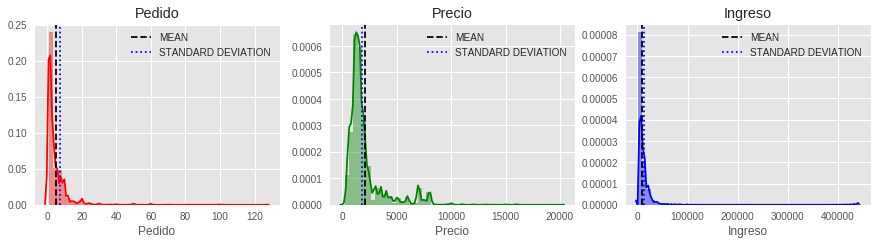

In [40]:
import warnings
import itertools
columns = ['Pedido', 'Precio',"Ingreso"]
length  = len(columns)
colors  = ["r","g","b"] 

plt.figure(figsize=(15,12))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(length/1,length/1,j+1)
    sns.distplot(data[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    plt.axvline(data[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(data[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")
     
print ("                      ***************************************")
print ("                       DISTRIBUTION OF VARIABLES IN DATA SET")
print ("                      ***************************************")

De acuerdo a la anterior grafica se observa que la distribucion de `Pedido`,`Precio`, `Ingreso` tiene una alta curtuosis dado que los valores se distribuyen mas hacia la media. Por otro lado se observan algunos valores atipicos que se salen de la normalidad de la distribucion para el caso de la variable pedido los datos atipicos se ven por encima de 10 y para precio por encima de 10000.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


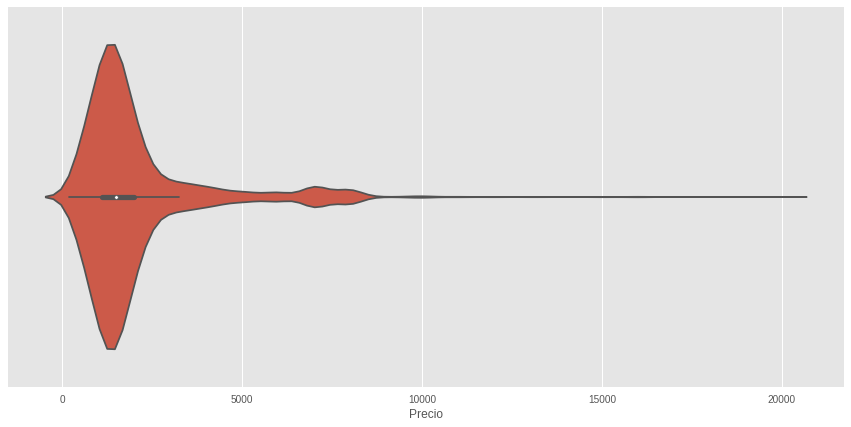

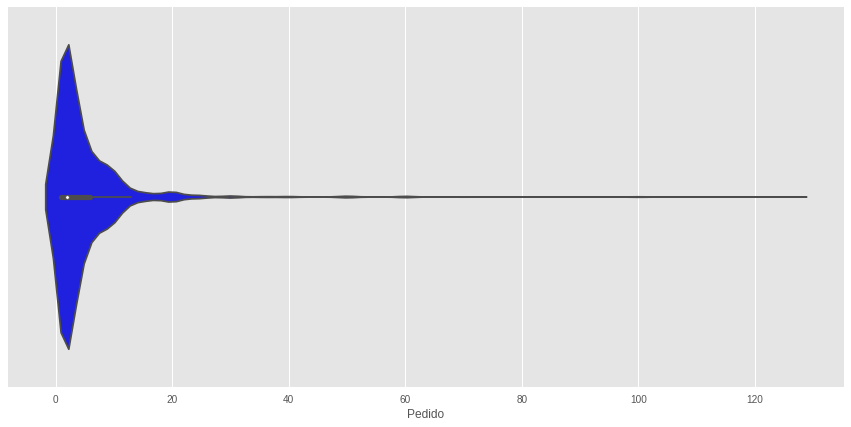

In [41]:
plt.figure(figsize=(15,7))
sns.violinplot("Precio", data=data);
plt.show()
plt.figure(figsize=(15,7))
sns.violinplot("Pedido", data=data,color="Blue");
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


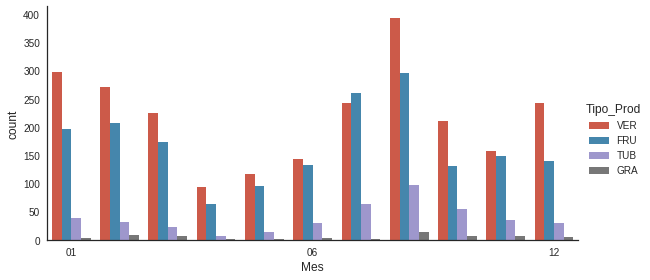

In [42]:
plt.figure(figsize=(15,12))
with sns.axes_style('white'):
    g = sns.factorplot("Mes", data=data, aspect=2,
                       kind="count", hue="Tipo_Prod")
    g.set_xticklabels(step=5)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


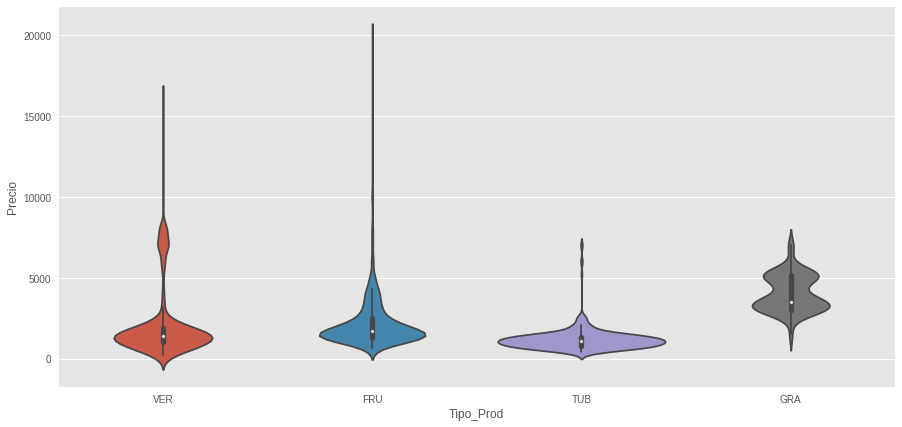

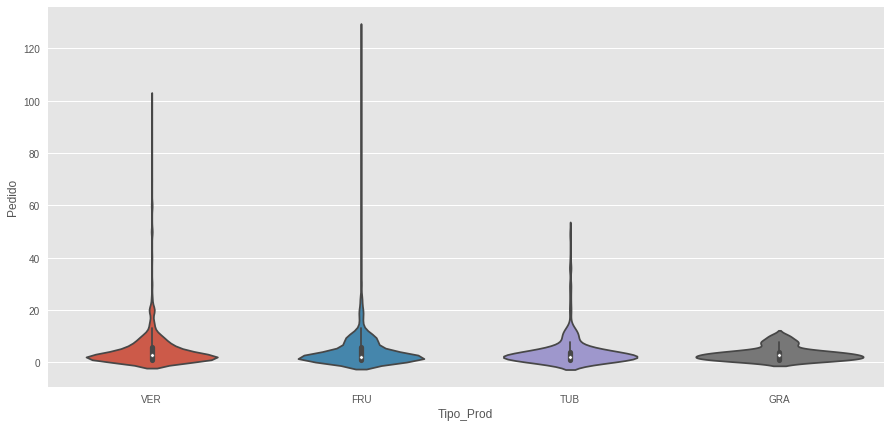

In [43]:
plt.figure(figsize=(15,7))
sns.violinplot("Tipo_Prod", "Precio", data=data);
plt.show()

plt.figure(figsize=(15,7))
sns.violinplot("Tipo_Prod", "Pedido", data=data);
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:932: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])


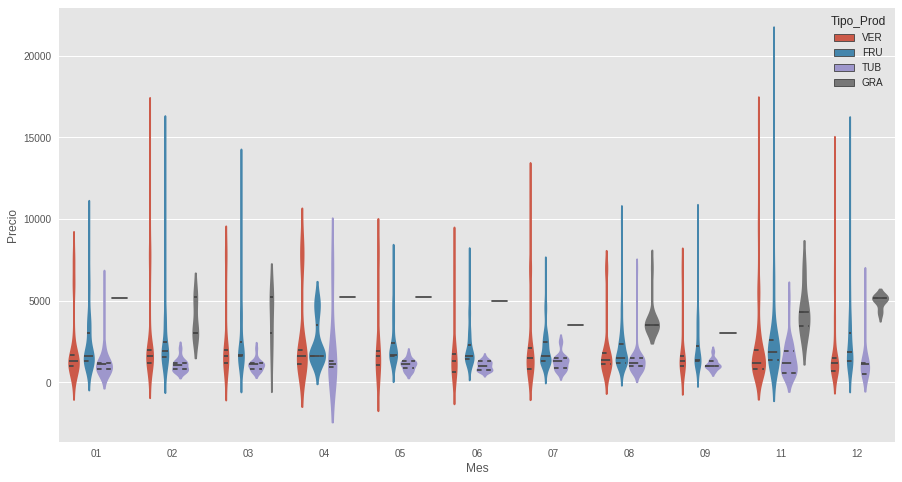

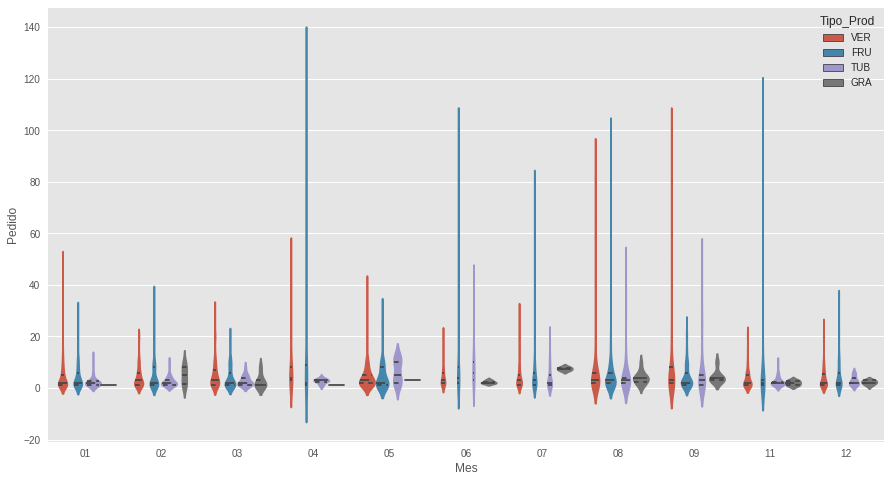

In [44]:
plt.figure(figsize=(15,8))
with sns.axes_style(style=None):
    sns.violinplot("Mes", "Precio", hue="Tipo_Prod", data=data,
                   split=False, inner="quartile");
plt.show()

plt.figure(figsize=(15,8))
with sns.axes_style(style=None):
    sns.violinplot("Mes", "Pedido", hue="Tipo_Prod", data=data,
                   split=False, inner="quartile");
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


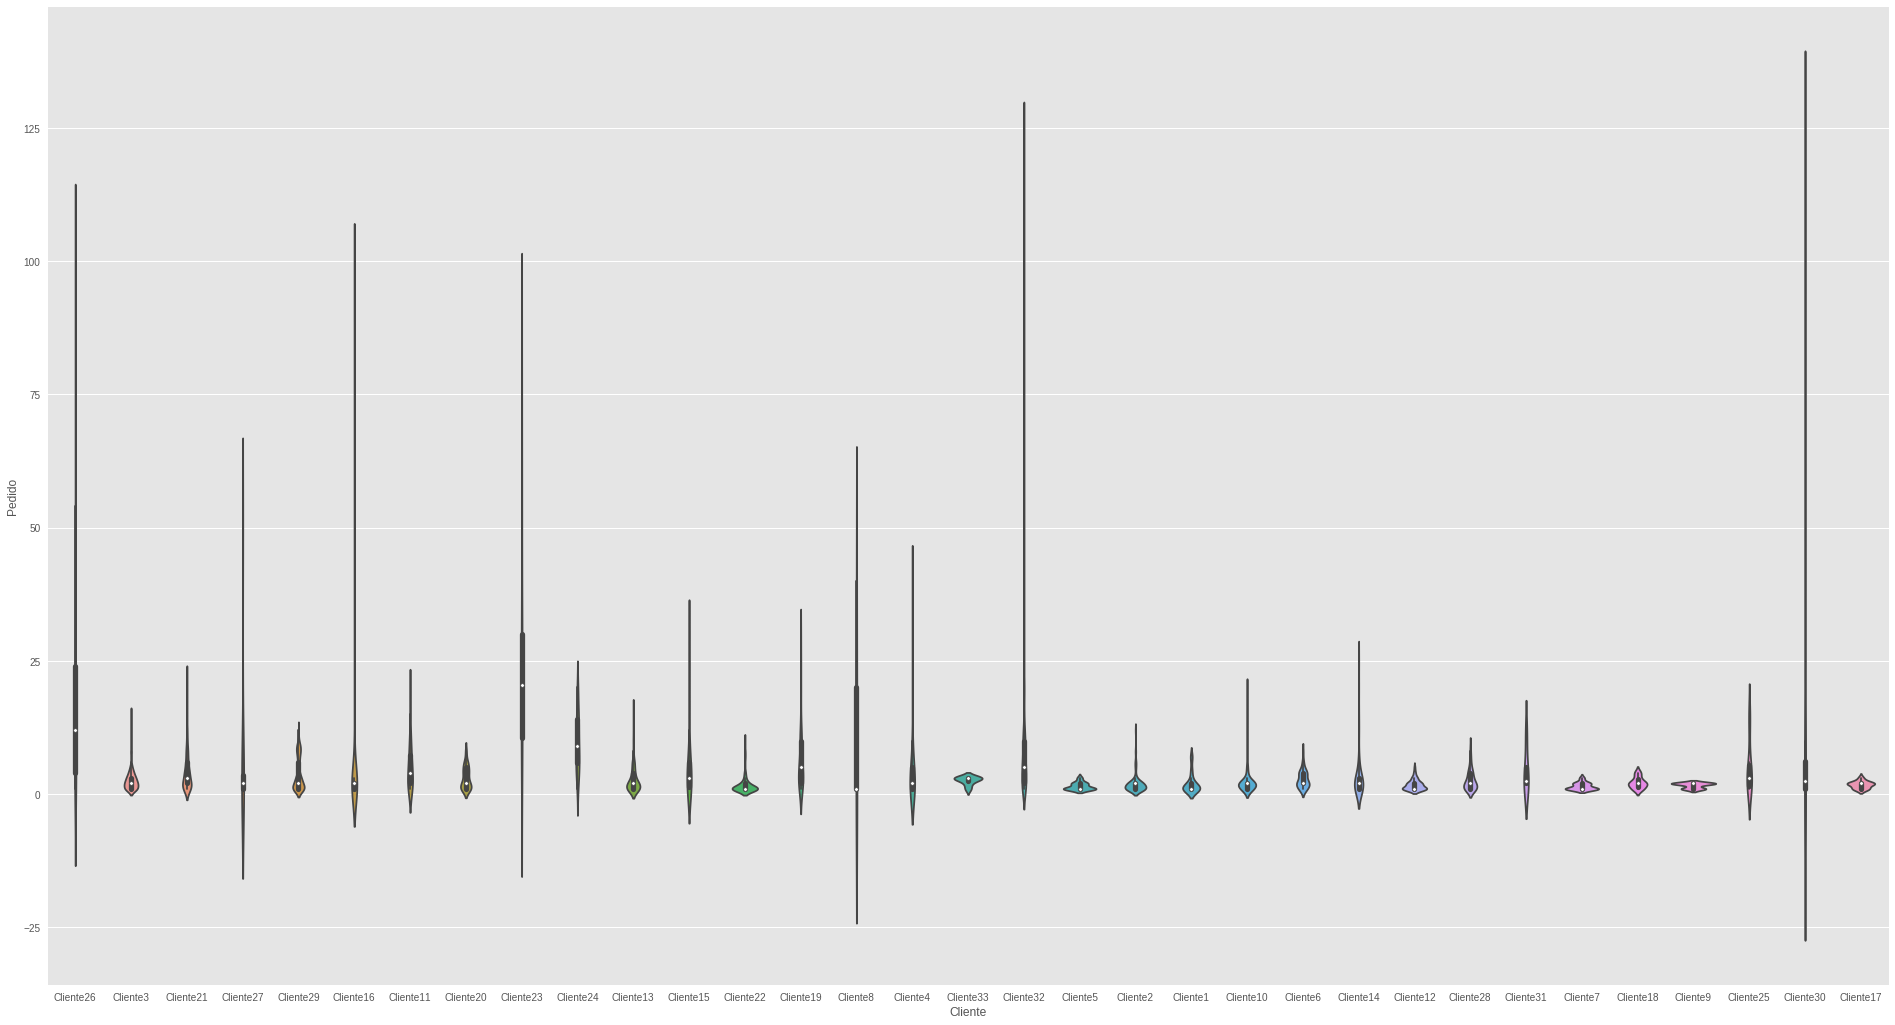

In [45]:
plt.figure(figsize=(33,18))
sns.violinplot("Cliente", "Pedido", data=data);
plt.show()

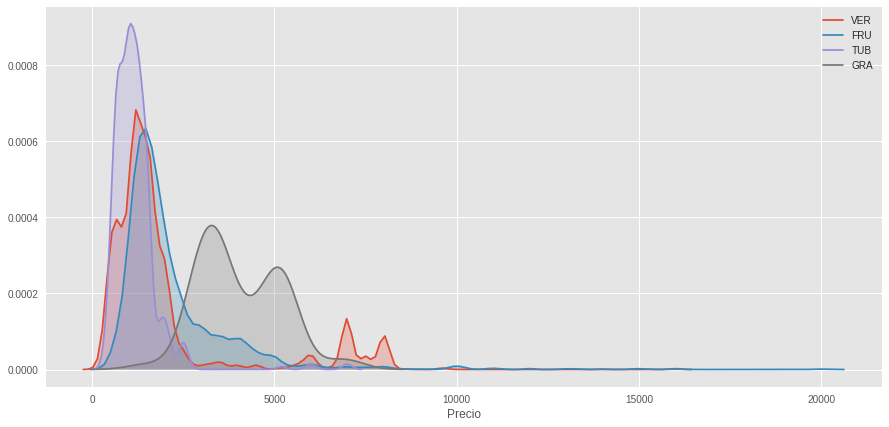

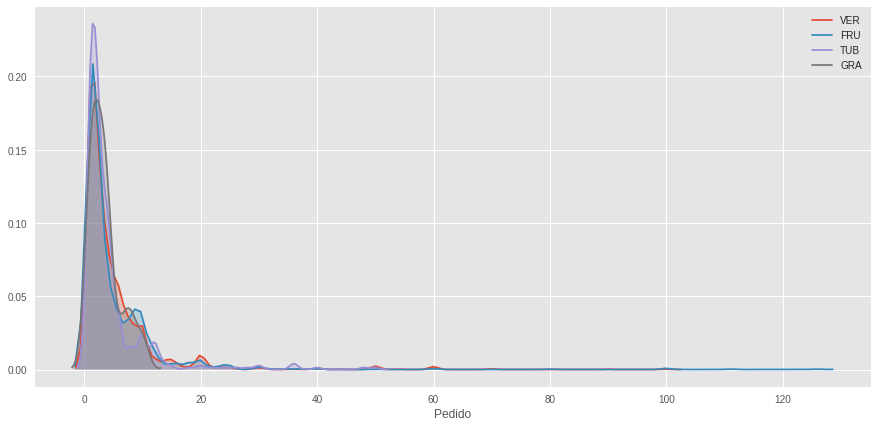

In [46]:
plt.figure(figsize=(15,7))
sns.kdeplot(data.Precio[data.Tipo_Prod=='VER'], label='VER', shade=True)
sns.kdeplot(data.Precio[data.Tipo_Prod=='FRU'], label='FRU', shade=True)
sns.kdeplot(data.Precio[data.Tipo_Prod=='TUB'], label='TUB', shade=True)
sns.kdeplot(data.Precio[data.Tipo_Prod=='GRA'], label='GRA', shade=True)
plt.xlabel('Precio');
plt.figure(figsize=(15,7))
sns.kdeplot(data.Pedido[data.Tipo_Prod=='VER'], label='VER', shade=True)
sns.kdeplot(data.Pedido[data.Tipo_Prod=='FRU'], label='FRU', shade=True)
sns.kdeplot(data.Pedido[data.Tipo_Prod=='TUB'], label='TUB', shade=True)
sns.kdeplot(data.Pedido[data.Tipo_Prod=='GRA'], label='GRA', shade=True)
plt.xlabel('Pedido');
plt.show()

In [0]:
data_Precio=pd.DataFrame(data["Precio"].groupby(data["Fecha"],sort=False).sum())
data_Pedido=pd.DataFrame(data["Pedido"].groupby(data["Fecha"],sort=False).sum())
data_Ingreso=pd.DataFrame(data["Ingreso"].groupby(data["Fecha"],sort=False).sum())
#data_Precio.to_csv('data_Precio.csv',index=True)
#data_Pedido.to_csv('data_Pedido.csv',index=True
#data_Ingreso.to_csv('data_Ingreso.csv',index=True)
#data_Ingreso=data_Ingreso.reset_index()

In [0]:
data_Pedido=pd.read_excel('data_Pedido.xlsx')
data_Ingreso=pd.read_excel('data_Ingreso.xlsx')

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [50]:
import plotly.plotly as py
import numpy as np
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import Contours, Histogram2dContour, Marker, Scatter, Line, Figure, Marker,Layout

configure_plotly_browser_state()

init_notebook_mode(connected=False)

trace1 = Scatter(
    x=data_Pedido["Fecha"],
    y=data_Pedido["Pedido"],
    name="Demanda",
    marker=Marker(color="Blue")
)

layout=Layout(title='Serie de Tiempo Demanda',xaxis=dict(title='Fecha',titlefont=dict(family='Courier New, monospace',size=18,color='#7f7f7f')), yaxis=dict(title='Demanda',
titlefont=dict(family='Courier New, monospace',size=18,color='#7f7f7f')))
              
data1 =[trace1]
fig =Figure(data=data1,layout=layout)
iplot(data1)

trace2 = Scatter(
    x=data_Ingreso["Fecha"],
    y=data_Ingreso["Ingreso"],
    name="Ingreso",
    marker=Marker(color="Red")
)

layout=Layout(title='Serie de Tiempo Ingreso',xaxis=dict(title='Fecha',titlefont=dict(family='Courier New, monospace',size=18,color='#7f7f7f')), yaxis=dict(title='Demanda',
titlefont=dict(family='Courier New, monospace',size=18,color='#7f7f7f')))
              
data2 =[trace2]
fig =Figure(data=data2,layout=layout)
iplot(data2)

In [0]:
Ingresos=data["Ingreso"].groupby(data["Nombre_producto"]).sum()

In [16]:
pd.options.display.max_seq_items = 10000
Ingresos=pd.DataFrame(Ingresos)
Ingresos.sort_values("Ingreso",ascending=False).head()

Ingreso
Nombre_producto         
Tomate Chonto    5981700
Champiñón        4029800
Pimentón Rojo    2203150
Lechuga Crespa   1718400
Zucchini Verde   1628100

In [0]:
Ingresos=Ingresos.sort_values("Ingreso",ascending=False)
Ingresos['cumulative_sum'] = Ingresos.Ingreso.cumsum()
Ingresos['cumulative_perc'] = 100*Ingresos.cumulative_sum/Ingresos.Ingreso.sum()
Ingresos['demarcation'] = 80

In [18]:
Ingresos=Ingresos.reset_index()
Ingresos.head()

Nombre_producto  Ingreso  cumulative_sum  cumulative_perc  demarcation
0   Tomate Chonto   5981700         5981700        15.534333           80
1       Champiñón   4029800        10011500        25.999628           80
2   Pimentón Rojo   2203150        12214650        31.721156           80
3  Lechuga Crespa   1718400        13933050        36.183800           80
4  Zucchini Verde   1628100        15561150        40.411938           80

In [55]:
from plotly.graph_objs import *

configure_plotly_browser_state()

init_notebook_mode(connected=False)

trace1 = Bar(
    x=Ingresos.Nombre_producto,
    y=Ingresos.Ingreso,
    name='Ingresos',
    marker=dict(
        color='rgb(34,163,192)'
               )
)
trace2 = Scatter(
    x=Ingresos.Nombre_producto,
    y=Ingresos.cumulative_perc,
    name='Cumulative Percentage',
    yaxis='y2',
    line=dict(
        color='rgb(243,158,115)',
        width=2.4
       )
)
trace3 = Scatter(
    x=Ingresos.Nombre_producto,
    y=Ingresos.demarcation,
    name='80% Pareto Rule',
    yaxis='y2',
    line=dict(
        color='rgba(128,128,128,.45)',
        dash = 'dash',
        width=1.5
       )
)
data = [trace1, trace2,trace3]
layout = Layout(
    title='Diagrama de Pareto Ingresos Start Up',
    titlefont=dict(
        color='',
        family='',
        size=0
    ),
    font=Font(
        color='rgb(128,128,128)',
        family='Balto, sans-serif',
        size=12
    ),
    width=1500,
    height=623,
    paper_bgcolor='rgb(240, 240, 240)',
    plot_bgcolor='rgb(240, 240, 240)',
    hovermode='compare',
    margin=dict(b=250,l=60,r=60,t=65),
    showlegend=True,
       legend=dict(
          x=.83,
          y=1.3,
          font=dict(
            family='Balto, sans-serif',
            size=12,
            color='rgba(128,128,128,.75)'
        ),
    ),
    annotations=[ dict(
                  text="Cumulative Percentage",
                  showarrow=False,
                  xref="paper", yref="paper",
                  textangle=90,
                  x=1.029, y=.75,
                  font=dict(
                  family='Balto, sans-serif',
                  size=14,
                  color='rgba(243,158,115,.9)'
            ),)],
    xaxis=dict(
      tickangle=-90
    ),
    yaxis=dict(
        title='Count',
        range=[0,5981700],
      tickfont=dict(
            color='rgba(34,163,192,.75)'
        ),
      tickvals = [0,1178340,2356680,3535020,4713360,5892000],
        titlefont=dict(
                family='Balto, sans-serif',
                size=14,
                color='rgba(34,163,192,.75)')
    ),
    yaxis2=dict(
        range=[0,101],
        tickfont=dict(
            color='rgba(243,158,115,.9)'
        ),
        tickvals = [0,20,40,60,80,100],
        overlaying='y',
        side='right'
    )
)

fig = dict(data=data, layout=layout)
iplot(fig)

In [17]:
Demanda=data["Pedido"].groupby(data["Nombre_producto"]).sum()
Demanda=pd.DataFrame(Demanda)
Demanda.sort_values("Pedido",ascending=False).head()

Pedido
Nombre_producto         
Tomate Chonto       4000
Pepino Cohombro     1360
Pimentón Rojo       1324
Zucchini Verde      1211
Lechuga Crespa      1094

In [18]:
Demanda=Demanda.sort_values("Pedido",ascending=False)
Demanda['cumulative_sum'] = Demanda.Pedido.cumsum()
Demanda['cumulative_perc'] = 100*Demanda.cumulative_sum/Demanda.Pedido.sum()
Demanda['demarcation'] = 80
Demanda.head()

Pedido  cumulative_sum  cumulative_perc  demarcation
Nombre_producto                                                       
Tomate Chonto       4000            4000        17.273395           80
Pepino Cohombro     1360            5360        23.146349           80
Pimentón Rojo       1324            6684        28.863842           80
Zucchini Verde      1211            7895        34.093363           80
Lechuga Crespa      1094            8989        38.817636           80

In [19]:
Demanda=Demanda.reset_index()
Demanda.head()

Nombre_producto  Pedido  cumulative_sum  cumulative_perc  demarcation
0    Tomate Chonto     4000            4000        17.273395           80
1  Pepino Cohombro     1360            5360        23.146349           80
2    Pimentón Rojo     1324            6684        28.863842           80
3   Zucchini Verde     1211            7895        34.093363           80
4   Lechuga Crespa     1094            8989        38.817636           80

In [69]:
from plotly.graph_objs import *

configure_plotly_browser_state()

init_notebook_mode(connected=False)

trace1 = Bar(
    x=Demanda.Nombre_producto,
    y=Demanda.Pedido,
    name='Pedido',
    marker=dict(
        color='rgb(34,163,192)'
               )
)
trace2 = Scatter(
    x=Demanda.Nombre_producto,
    y=Demanda.cumulative_perc,
    name='Cumulative Percentage',
    yaxis='y2',
    line=dict(
        color='rgb(243,158,115)',
        width=2.4
       )
)
trace3 = Scatter(
    x=Demanda.Nombre_producto,
    y=Demanda.demarcation,
    name='80% Pareto Rule',
    yaxis='y2',
    line=dict(
        color='rgba(128,128,128,.45)',
        dash = 'dash',
        width=1.5
       )
)
data = [trace1, trace2,trace3]
layout = Layout(
    title='Diagrama de Pareto Pedido Start Up',
    titlefont=dict(
        color='',
        family='',
        size=0
    ),
    font=Font(
        color='rgb(128,128,128)',
        family='Balto, sans-serif',
        size=12
    ),
    width=1500,
    height=623,
    paper_bgcolor='rgb(240, 240, 240)',
    plot_bgcolor='rgb(240, 240, 240)',
    hovermode='compare',
    margin=dict(b=250,l=60,r=60,t=65),
    showlegend=True,
       legend=dict(
          x=.83,
          y=1.3,
          font=dict(
            family='Balto, sans-serif',
            size=12,
            color='rgba(128,128,128,.75)'
        ),
    ),
    annotations=[ dict(
                  text="Cumulative Percentage",
                  showarrow=False,
                  xref="paper", yref="paper",
                  textangle=90,
                  x=1.029, y=.75,
                  font=dict(
                  family='Balto, sans-serif',
                  size=14,
                  color='rgba(243,158,115,.9)'
            ),)],
    xaxis=dict(
      tickangle=-90
    ),
    yaxis=dict(
        title='Count',
        range=[0,5000],
      tickfont=dict(
            color='rgba(34,163,192,.75)'
        ),
      tickvals = [0,820,1640,2460,3280,4100],
        titlefont=dict(
                family='Balto, sans-serif',
                size=14,
                color='rgba(34,163,192,.75)')
    ),
    yaxis2=dict(
        range=[0,101],
        tickfont=dict(
            color='rgba(243,158,115,.9)'
        ),
        tickvals = [0,20,40,60,80,100],
        overlaying='y',
        side='right'
    )
)

fig = dict(data=data, layout=layout)
iplot(fig)

In [70]:
print ("                                                           ") 
print ("                                                    TOP PRODUCTOS PEDIDO")
Demanda.head(26)

                                                           
                                                    TOP PRODUCTOS PEDIDO


Nombre_producto  Pedido  cumulative_sum  cumulative_perc  \
0             Tomate Chonto     4000            4000        17.273395   
1           Pepino Cohombro     1360            5360        23.146349   
2             Pimentón Rojo     1324            6684        28.863842   
3            Zucchini Verde     1211            7895        34.093363   
4            Lechuga Crespa     1094            8989        38.817636   
5            Plátano Maduro     1064           10053        43.412359   
6                 Zanahoria      961           11014        47.562292   
7   Cebolla Cabezona Blanca      874           11888        51.336529   
8     Cebolla Cabezona Roja      858           12746        55.041672   
9              Limón Tahití      802           13548        58.504988   
10                Berenjena      670           14218        61.398281   
11                Champiñón      547           14765        63.760418   
12           Banano Criollo      518           15283        65.997323   
13        Tomate Larga Vida      471           15754        68.031265   
14             Perejil Liso      400           16154        69.758604   
15            Aguacate Haas      300           16454        71.054109   
16                  Ahuyama      271           16725        72.224381   
17           Naranja Sweety      270           16995        73.390336   
18             Fresa Pareja      255           17250        74.491514   
19       Aguacate Papelillo      229           17479        75.480416   
20               Yerbabuena      221           17700        76.434771   
21                 Cilantro      220           17920        77.384808   
22            Cebolla Larga      198           18118        78.239841   
23             Papa Criolla      197           18315        79.090556   
24                   Rúgula      188           18503        79.902405   
25       Mango Tommy Atkins      178           18681        80.671071   

    demarcation  
0            80  
1            80  
2            80  
3            80  
4            80  
5            80  
6            80  
7            80  
8            80  
9            80  
10           80  
11           80  
12           80  
13           80  
14           80  
15           80  
16           80  
17           80  
18           80  
19           80  
20           80  
21           80  
22           80  
23           80  
24           80  
25           80

In [71]:
print ("                                                         ")
print ("                                                   TOP PRODUCTOS INGRESO")
Ingresos.head(27)

                                                         
                                                   TOP PRODUCTOS INGRESO


Nombre_producto  Ingreso  cumulative_sum  cumulative_perc  \
0             Tomate Chonto   5981700         5981700        15.534333   
1                 Champiñón   4029800        10011500        25.999628   
2             Pimentón Rojo   2203150        12214650        31.721156   
3            Lechuga Crespa   1718400        13933050        36.183800   
4            Zucchini Verde   1628100        15561150        40.411938   
5     Cebolla Cabezona Roja   1352800        16913950        43.925127   
6           Pepino Cohombro   1311030        18224980        47.329841   
7   Cebolla Cabezona Blanca   1202220        19427200        50.451978   
8            Plátano Maduro   1132900        20560100        53.394092   
9                 Zanahoria   1125600        21685700        56.317249   
10             Limón Tahití   1035500        22721200        59.006418   
11                Berenjena    973400        23694600        61.534314   
12           Perejil Crespo    917200        24611800        63.916261   
13        Tomate Larga Vida    719200        25331000        65.784006   
14            Aguacate Haas    600000        25931000        67.342192   
15           Banano Criollo    591600        26522600        68.878563   
16       Aguacate Papelillo    579900        27102500        70.384550   
17       Mazorca Desgranada    482000        27584500        71.636292   
18             Fresa Pareja    463200        28047700        72.839212   
19                    Breva    462000        28509700        74.039015   
20                   Rúgula    384400        28894100        75.037293   
21        Piña Golden Sweet    376480        29270580        76.015002   
22             Perejil Liso    363900        29634480        76.960042   
23            Mora Castilla    345150        29979630        77.856388   
24       Mango Tommy Atkins    296780        30276410        78.627119   
25                  Brócoli    292640        30569050        79.387098   
26             Papa Criolla    265540        30834590        80.076699   

    demarcation  
0            80  
1            80  
2            80  
3            80  
4            80  
5            80  
6            80  
7            80  
8            80  
9            80  
10           80  
11           80  
12           80  
13           80  
14           80  
15           80  
16           80  
17           80  
18           80  
19           80  
20           80  
21           80  
22           80  
23           80  
24           80  
25           80  
26           80

In [33]:
Ingresos2=Ingresos.head(27)
array = Ingresos2["Nombre_producto"]
data27=data[data['Nombre_producto'].isin(array)]
#data27.to_csv("data27.csv",index=True)
data27.head()

Cliente       Fecha  Pedido  Precio Producto  Nombre_producto  \
0  Cliente26  18/09/2017      20     700  VER0049      Yerbabuena    
1  Cliente26  18/09/2017      10    1200  FRU0024    Limón Tahití    
2  Cliente26  18/09/2017       4    1600  VER0041          Puerro    
3  Cliente26  18/09/2017      10    1500  VER0038   Pimentón Rojo    
4  Cliente26  18/09/2017       8    1100  VER0010  Zucchini Verde    

      Cantidad Tipo_Prod  Cod Dia Mes   Año  Ingreso  
0   100 gramos       VER  049  18  09  2017    14000  
1        Libra       FRU  024  18  09  2017    12000  
2        Libra       VER  041  18  09  2017     6400  
3        Libra       VER  038  18  09  2017    15000  
4        Libra       VER  010  18  09  2017     8800

# Modelo Predictivo Demanda

## Transformacion de Datos para modelos neuronales

In [19]:
Ingresos2=Ingresos
array = Ingresos2["Nombre_producto"]
data121=data[data['Nombre_producto'].isin(array)]
#data27.to_csv("data27.csv",index=True)
data121["Fecha"]=pd.to_datetime(data121["Fecha"],format="%d/%m/%Y")
data121.head()

Cliente      Fecha  Pedido  Precio Producto  Nombre_producto  \
0  Cliente26 2017-09-18      20     700  VER0049      Yerbabuena    
1  Cliente26 2017-09-18      10    1200  FRU0024    Limón Tahití    
2  Cliente26 2017-09-18       4    1600  VER0041          Puerro    
3  Cliente26 2017-09-18      10    1500  VER0038   Pimentón Rojo    
4  Cliente26 2017-09-18       8    1100  VER0010  Zucchini Verde    

      Cantidad Tipo_Prod  Cod Dia Mes   Año  Ingreso  
0   100 gramos       VER  049  18  09  2017    14000  
1        Libra       FRU  024  18  09  2017    12000  
2        Libra       VER  041  18  09  2017     6400  
3        Libra       VER  038  18  09  2017    15000  
4        Libra       VER  010  18  09  2017     8800

In [164]:
import datetime
start = datetime.datetime(2016,11,3)
end = datetime.datetime(2017,9,18)
daterange = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]
daterange = pd.DataFrame(daterange)
daterange.columns = ['Fecha']
daterange.shape

(319, 1)

In [167]:
Missing_Days = pd.merge(daterange, data121, on='Fecha', how='left')
Missing_Days['Nombre_producto'].fillna('Breva', inplace=True)
Missing_Days["Nombre_producto"]=Missing_Days["Nombre_producto"].str.strip()
Missing_Days

Fecha    Cliente  Pedido   Precio Producto          Nombre_producto  \
0    2016-11-03  Cliente16     2.0   6000.0  FRU0019                  Guayaba   
1    2016-11-03  Cliente16     3.0   3000.0  GRA0011                  Lenteja   
2    2016-11-03  Cliente16    10.0   2500.0  TUB0015                Arracacha   
3    2016-11-03  Cliente16     1.0   2500.0  VER0112                 Toronjil   
4    2016-11-04        NaN     NaN      NaN      NaN                    Breva   
5    2016-11-05        NaN     NaN      NaN      NaN                    Breva   
6    2016-11-06        NaN     NaN      NaN      NaN                    Breva   
7    2016-11-07        NaN     NaN      NaN      NaN                    Breva   
8    2016-11-08        NaN     NaN      NaN      NaN                    Breva   
9    2016-11-09        NaN     NaN      NaN      NaN                    Breva   
10   2016-11-10        NaN     NaN      NaN      NaN                    Breva   
11   2016-11-11        NaN     NaN      NaN      NaN                    Breva   
12   2016-11-12        NaN     NaN      NaN      NaN                    Breva   
13   2016-11-13        NaN     NaN      NaN      NaN                    Breva   
14   2016-11-14        NaN     NaN      NaN      NaN                    Breva   
15   2016-11-15        NaN     NaN      NaN      NaN                    Breva   
16   2016-11-16  Cliente30     2.0   1900.0  TUB0008            Papa Sabanera   
17   2016-11-16  Cliente30     1.0   2000.0  FRU0051             Uva Isabella   
18   2016-11-16  Cliente30     3.0   4000.0  FRU0005             Ají Jalapeño   
19   2016-11-16  Cliente30    10.0   3500.0  FRU0006               Ají Rocoto   
20   2016-11-17  Cliente27     1.0  20000.0  FRU0004               Ají Chirca   
21   2016-11-17  Cliente27     7.0    750.0  VER0006                  Ahuyama   
22   2016-11-17  Cliente27     3.0   2800.0  FRU0017               Granadilla   
23   2016-11-17  Cliente27     4.0   2100.0  FRU0013                   Curuba   
24   2016-11-17  Cliente27     5.0   2000.0  FRU0002            Aguacate Haas   
25   2016-11-18  Cliente30   100.0    800.0  FRU0036          Papaya Hawaiana   
26   2016-11-18  Cliente17     3.0   3200.0  VER0004                Alcachofa   
27   2016-11-18  Cliente17     2.0   1600.0  TUB0009              Rábano Rojo   
28   2016-11-18  Cliente17     2.0   3200.0  GRA0004          Haba Desgranada   
29   2016-11-18  Cliente17     1.0   2800.0  FRU0045            Tomate Cherry   
...         ...        ...     ...      ...      ...                      ...   
4715 2017-09-16   Cliente3     4.0   1900.0  VER0009                  Brócoli   
4716 2017-09-16   Cliente3     3.0   1200.0  VER0007                Berenjena   
4717 2017-09-16   Cliente3     2.0   1100.0  VER0005                     Apio   
4718 2017-09-16   Cliente3     6.0    900.0  VER0003                 Albahaca   
4719 2017-09-16   Cliente3     1.0   5800.0  VER0002            Ajo Importado   
4720 2017-09-16   Cliente3     5.0   1000.0  TUB0012                Zanahoria   
4721 2017-09-16   Cliente3     3.0   1000.0  TUB0008            Papa Sabanera   
4722 2017-09-16   Cliente3     2.0   1000.0  TUB0001                Arracacha   
4723 2017-09-16   Cliente3     4.0   3000.0  GRA0006       Mazorca Desgranada   
4724 2017-09-16   Cliente3    10.0   1300.0  FRU0046            Tomate Chonto   
4725 2017-09-16   Cliente3     3.0   4000.0  FRU0045            Tomate Cherry   
4726 2017-09-16   Cliente3     1.0    650.0  FRU0034           Naranja Sweety   
4727 2017-09-16   Cliente3     3.0   1200.0  FRU0024             Limón Tahití   
4728 2017-09-16   Cliente3     3.0   1000.0  FRU0020             Guayaba Pera   
4729 2017-09-16   Cliente3     4.0   1100.0  FRU0008           Banano Criollo   
4730 2017-09-16   Cliente3     4.0   2000.0  FRU0003       Aguacate Papelillo   
4731 2017-09-17  Cliente29     1.0    900.0  VER0035          Pepino Cohombro   
4732 2017-09-17  Cliente29     1.0   1500

In [177]:
#######Validacion Jose
#Missing_Days2 =Missing_Days.fillna(0, inplace=True)
table_precio = pd.pivot_table(Missing_Days, values='Precio', index=['Fecha'],columns=['Nombre_producto'], aggfunc=np.sum,fill_value=0)
Final_Data121_Precio=table_precio.reset_index()
#Final_Data121_Precio
dataFinal21=Final_Data121_Precio.T
dataFinal21

0                    1    \
Nombre_producto                                             
Fecha            2016-11-03 00:00:00  2016-11-04 00:00:00   
Ají Chirca                         0                    0   
Arracacha                       2500                    0   
Breva                              0                    0   
Chontaduro                         0                    0   
Lenteja                         3000                    0   
Toronjil                        2500                    0   
Zapote                             0                    0   

                                 2                    3    \
Nombre_producto                                             
Fecha            2016-11-05 00:00:00  2016-11-06 00:00:00   
Ají Chirca                         0                    0   
Arracacha                          0                    0   
Breva                              0                    0   
Chontaduro                         0                    0   
Lenteja                            0                    0   
Toronjil                           0                    0   
Zapote                             0                    0   

                                 4                    5    \
Nombre_producto                                             
Fecha            2016-11-07 00:00:00  2016-11-08 00:00:00   
Ají Chirca                         0                    0   
Arracacha                          0                    0   
Breva                              0                    0   
Chontaduro                         0                    0   
Lenteja                            0                    0   
Toronjil                           0                    0   
Zapote                             0                    0   

                                 6                    7    \
Nombre_producto                                             
Fecha            2016-11-09 00:00:00  2016-11-10 00:00:00   
Ají Chirca                         0                    0   
Arracacha                          0                    0   
Breva                              0                    0   
Chontaduro                         0                    0   
Lenteja                            0                    0   
Toronjil                           0                    0   
Zapote                             0                    0   

                                 8                    9    \
Nombre_producto                                             
Fecha            2016-11-11 00:00:00  2016-11-12 00:00:00   
Ají Chirca                         0                    0   
Arracacha                          0                    0   
Breva                              0                    0   
Chontaduro                         0                    0   
Lenteja                            0                    0   
Toronjil                           0                    0   
Zapote                             0                    0   

                        ...                           309  \
Nombre_producto         ...                                 
Fecha                   ...           2017-09-08 00:00:00   
Ají Chirca              ...                             0   
Arracacha               ...                             0   
Breva                   ...                             0   
Chontaduro              ...                             0   
Lenteja                 ...                             0   
Toronjil                ...                             0   
Zapote                  ...                             0   

                                 310                  311  \
Nombre_producto                                             
Fecha            2017-09-09 00:00:00  2017-09-10 00:00:00   
Ají Chirca                         0                    0   
Arracacha                          0                    0   
Breva                              0                    0   
C

In [20]:
table = pd.pivot_table(data121, values='Pedido', index=['Fecha'],columns=['Nombre_producto'], aggfunc=np.sum,fill_value=0)
Final_Data121=table.reset_index()
#table.to_csv("Final Dataset.csv")
Final_Data121

Nombre_producto      Fecha  Acelga   Agraz   Aguacate Haas   \
0               2016-11-03        0       0               0   
1               2016-11-16        0       0               0   
2               2016-11-17        0       0               5   
3               2016-11-18        0      10             113   
4               2016-11-20        0       0               0   
5               2016-11-21        0       0               0   
6               2016-11-22        0       0               0   
7               2016-11-23       10       2               3   
8               2016-11-24        0       0               0   
9               2016-11-25        0       0               0   
10              2016-11-26        0       0               2   
11              2016-11-27        0       0               0   
12              2016-11-28        0       0               0   
13              2016-11-29        0       0               0   
14              2016-11-30        0       0               0   
15              2016-12-01        1       0               0   
16              2016-12-02        0       0               0   
17              2016-12-04        0       0               0   
18              2016-12-05        0       0              11   
19              2016-12-06        0       0               0   
20              2016-12-07        0       0               0   
21              2016-12-08        0       0               0   
22              2016-12-09        0       0               0   
23              2016-12-11        0       0               0   
24              2016-12-12        0       0               0   
25              2016-12-13        0       1               2   
26              2016-12-14        0       0               0   
27              2016-12-15        0       0               0   
28              2016-12-16        0       0               0   
29              2016-12-18        0       0               0   
..                     ...      ...     ...             ...   
212             2017-08-16        0       2               0   
213             2017-08-17        0       0               0   
214             2017-08-19        0       0               4   
215             2017-08-21        0       0               0   
216             2017-08-22        0       0               0   
217             2017-08-23        0       0               0   
218             2017-08-24        0       0               0   
219             2017-08-25        0       0               0   
220             2017-08-26        0       0               0   
221             2017-08-27        0       0               0   
222             2017-08-28        0       0             100   
223             2017-08-29        0       0               0   
224             2017-08-30        0       0               0   
225             2017-08-31        0       0               0   
226             2017-09-02        0       0               0   
227             2017-09-03        0       0               0   
228             2017-09-04        0       0               0   
229             2017-09-05        0       0               0   
230             2017-09-06        0       0               0   
231             2017-09-07        0       0               0   
232             2017-09-08        0       0               0   
233             2017-09-09        0       0               0   
234             2017-09-11        0       0               0   
235             2017-09-12        0       0               0   
236             2017-09-13        0       0               0   
237             2017-09-14        0       0               0   
238             2017-09-15        0       0              10   
239             2017-09-16        0       0               0   
240             2017-09-17        0       0               0   
241             2017-09-18        0       0               0   

Nombre_producto  Aguacate Papelillo   Ahuyama   Ajo Importado   Ajo Nacional   \
0           

                                                           ***************************************
                                                            SERIE DE TIEMPO POR PRODUCTO PARETO
                                                           ***************************************


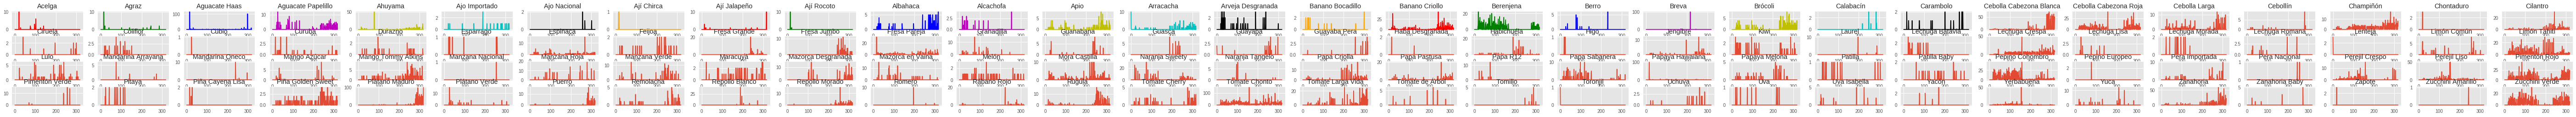

In [97]:
import itertools
import seaborn as sns

columns=['Acelga', 'Agraz', 'Aguacate Haas', 'Aguacate Papelillo',
       'Ahuyama', 'Ajo Importado', 'Ajo Nacional', 'Ají Chirca',
       'Ají Jalapeño', 'Ají Rocoto', 'Albahaca', 'Alcachofa', 'Apio',
       'Arracacha', 'Arveja Desgranada', 'Banano Bocadillo', 'Banano Criollo',
       'Berenjena', 'Berro', 'Breva', 'Brócoli', 'Calabacín', 'Carambolo',
       'Cebolla Cabezona Blanca', 'Cebolla Cabezona Roja', 'Cebolla Larga',
       'Cebollín', 'Champiñón', 'Chontaduro', 'Cilantro', 'Ciruela',
       'Coliflor', 'Cubio', 'Curuba', 'Durazno', 'Esparrago', 'Espinaca',
       'Feijoa', 'Fresa Grande', 'Fresa Jumbo', 'Fresa Pareja', 'Granadilla',
       'Guanabana', 'Guasca', 'Guayaba', 'Guayaba Pera', 'Haba Desgranada',
       'Habichuela', 'Higo', 'Jengibre', 'Kiwi', 'Laurel', 'Lechuga Batavia',
       'Lechuga Crespa', 'Lechuga Lisa', 'Lechuga Morada', 'Lechuga Romana',
       'Lenteja', 'Limón Común', 'Limón Tahití', 'Lulo', 'Mandarina Arrayana',
       'Mandarina Oneco', 'Mango Azúcar', 'Mango Tommy Atkins',
       'Manzana Nacional', 'Manzana Roja', 'Manzana Verde', 'Maracuyá',
       'Mazorca Desgranada', 'Mazorca en Vaina', 'Melón', 'Mora Castilla',
       'Naranja Sweety', 'Naranja Tangelo', 'Papa Criolla', 'Papa Pastusa',
       'Papa R12', 'Papa Sabanera', 'Papaya Hawaiana', 'Papaya Melona',
       'Patilla', 'Patilla Baby', 'Pepino Cohombro', 'Pepino Europeo',
       'Pera Importada', 'Pera Nacional', 'Perejil Crespo', 'Perejil Liso',
       'Pimentón Rojo', 'Pimentón Verde', 'Pitaya', 'Piña Cayena Lisa',
       'Piña Golden Sweet', 'Plátano Maduro', 'Plátano Verde', 'Puerro',
       'Remolacha', 'Repollo Blanco', 'Repollo Morado', 'Romero',
       'Rábano Rojo', 'Rúgula', 'Tomate Cherry', 'Tomate Chonto',
       'Tomate Larga Vida', 'Tomate de Árbol', 'Tomillo', 'Toronjil', 'Uchuva',
       'Uva', 'Uva Isabella', 'Yacón', 'Yerbabuena', 'Yuca', 'Zanahoria',
       'Zanahoria Baby', 'Zapote', 'Zucchini Amarillo', 'Zucchini Verde']

length  = len(columns)
colors  = ["r","g","b","m","y","c","k","orange","r","g","b","m","y","c","k","orange","r","g","b","m","y","c","k"] 

plt.figure(figsize=(100,40))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(length/3,length/4,j+1)
    plt.plot(Final_Data121[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    #plt.axvline(data[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    #plt.axvline(data[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    #plt.legend(loc="upper right")
     
print ("                                                           ***************************************")
print ("                                                            SERIE DE TIEMPO POR PRODUCTO PARETO")
print ("                                                           ***************************************")

## LSTM Enfoque  Sequence to Sequence 

In [218]:
dataFinal2=dataFinal.T
dataFinal2

Fecha                     2016-11-17  2016-11-18  2016-11-20  2016-11-21  \
Aguacate Haas                    5.0       113.0         0.0         0.0   
Aguacate Papelillo               0.0         0.0         0.0         0.0   
Banano Criollo                   0.0         5.0         0.0         2.0   
Berenjena                        0.0         0.0         4.0         5.0   
Breva                            0.0         0.0         0.0         0.0   
Brócoli                          0.0         0.0         0.0         0.0   
Cebolla Cabezona Blanca          0.0         0.0         0.0         2.0   
Cebolla Cabezona Roja            0.0         0.0         5.0         1.0   
Champiñón                        0.0         0.0         2.0         1.0   
Fresa Pareja                     0.0        30.0         3.0         0.0   
Lechuga Crespa                   0.0         0.0         0.0         0.0   
Limón Tahití                     0.0         0.0         0.0         4.0   
Mango Tommy Atkins               0.0         0.0         2.0         0.0   
Mazorca Desgranada               0.0         0.0         0.0         0.0   
Mora Castilla                    0.0         0.0         1.0         0.0   
Papa Criolla                     0.0         0.0         0.0         2.0   
Pepino Cohombro                  0.0         0.0        20.0         2.0   
Perejil Crespo                   0.0         0.0         1.0         0.0   
Perejil Liso                     0.0         0.0         1.0         2.0   
Pimentón Rojo                    0.0         0.0         5.0         9.0   
Piña Golden Sweet                0.0         0.0         1.0         0.0   
Plátano Maduro                   0.0         0.0         0.0         0.0   
Rúgula                           0.0         5.0         0.0         0.0   
Tomate Chonto                    0.0         0.0        10.0         8.0   
Tomate Larga Vida                0.0         0.0         0.0         0.0   
Zanahoria                        0.0         0.0         2.0         2.0   
Zucchini Verde                   0.0         0.0         5.0         5.0   

Fecha                     2016-11-22  2016-11-23  2016-11-24  2016-11-25  \
Aguacate Haas                    0.0         3.0         0.0         0.0   
Aguacate Papelillo               0.0         3.0         0.0         5.0   
Banano Criollo                   2.0        38.0         0.0         9.0   
Berenjena                       22.0         0.0        11.0         0.0   
Breva                            0.0         0.0         0.0         0.0   
Brócoli                          1.0         0.0         0.0         3.0   
Cebolla Cabezona Blanca          0.0         0.0         0.0         1.0   
Cebolla Cabezona Roja            7.0         0.0         9.0         5.0   
Champiñón                        1.0         0.0         0.0         3.0   
Fresa Pareja                     0.0         0.0         1.0         4.0   
Lechuga Crespa                   0.0         0.0         0.0         2.0   
Limón Tahití                     6.0         0.0         5.0         0.0   
Mango Tommy Atkins               0.0         0.0         0.0         0.0   
Mazorca Desgranada               0.0         0.0         0.0         0.0   
Mora Castilla                    5.0         0.0         0.0         3.0   
Papa Criolla                     0.0         0.0         0.0         0.0   
Pepino Cohombro                 16.0         0.0        28.0         3.0   
Perejil Crespo                   0.0         0.0         0.0         0.0   
Perejil Liso                     0.0         0.0         0.0         1.0   
Pimentón Rojo                    7.0         0.0        23.0         1.0   
Piña Golden Sweet                0.0         0.0         0.0         0.0   
Plátano Maduro                   0.0         0.0         0.0         0.0   
Rúgula                           0.0         0.0         0.0         3.0   
Tomate Chonto                   43.0         0.

In [19]:
dataFinal3=dataFinal2.reset_index()
dataFinal3.head()

Fecha                index  2016-11-17 00:00:00  2016-11-18 00:00:00  \
0           Aguacate Haas                   5.0                113.0   
1      Aguacate Papelillo                   0.0                  0.0   
2          Banano Criollo                   0.0                  5.0   
3               Berenjena                   0.0                  0.0   
4                   Breva                   0.0                  0.0   

Fecha  2016-11-20 00:00:00  2016-11-21 00:00:00  2016-11-22 00:00:00  \
0                      0.0                  0.0                  0.0   
1                      0.0                  0.0                  0.0   
2                      0.0                  2.0                  2.0   
3                      4.0                  5.0                 22.0   
4                      0.0                  0.0                  0.0   

Fecha  2016-11-23 00:00:00  2016-11-24 00:00:00  2016-11-25 00:00:00  \
0                      3.0                  0.0                  0.0   
1                      3.0                  0.0                  5.0   
2                     38.0                  0.0                  9.0   
3                      0.0                 11.0                  0.0   
4                      0.0                  0.0                  0.0   

Fecha  2016-11-26 00:00:00         ...           2017-09-08 00:00:00  \
0                      2.0         ...                           0.0   
1                      0.0         ...                           0.0   
2                      0.0         ...                           0.0   
3                      0.0         ...                           0.0   
4                      0.0         ...                           0.0   

Fecha  2017-09-09 00:00:00  2017-09-11 00:00:00  2017-09-12 00:00:00  \
0                      0.0                  0.0                  0.0   
1                      3.0                  5.0                  0.0   
2                      0.0                 11.0                  6.0   
3                      7.0                  5.0                  0.0   
4                      0.0                  0.0                  0.0   

Fecha  2017-09-13 00:00:00  2017-09-14 00:00:00  2017-09-15 00:00:00  \
0                      0.0                  0.0                 10.0   
1                      3.0                  1.0                  0.0   
2                      3.0                  2.0                  0.0   
3                      6.0                  0.0                  0.0   
4                      0.0                  0.0                  0.0   

Fecha  2017-09-16 00:00:00  2017-09-17 00:00:00  2017-09-18 00:00:00  
0                      0.0                  0.0                  0.0  
1                      4.0                  0.0                  5.0  
2                      4.0                  0.0                 19.0  
3                      3.0                  0.0                  5.0  
4                      0.0                  0.0                  0.0  

[5 rows x 241 columns]

In [20]:
data_start_date = dataFinal3.columns[1]
data_end_date = dataFinal3.columns[-1]
print('Data ranges from %s to %s' % (data_start_date, data_end_date))

Data ranges from 2016-11-17 00:00:00 to 2017-09-18 00:00:00


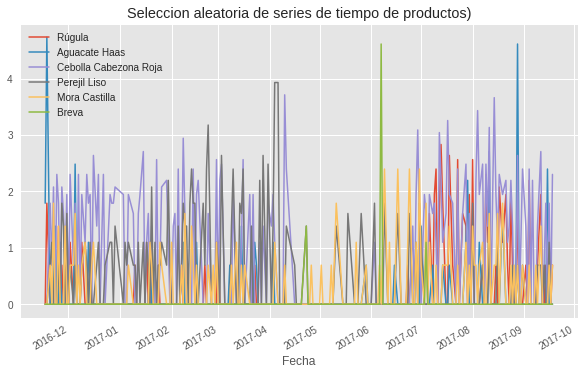

In [21]:
def plot_random_series(df, n_series):
    
    sample = df.sample(n_series, random_state=8)
    page_labels = sample['index'].tolist()
    series_samples = sample.loc[:,data_start_date:data_end_date]
    
    plt.figure(figsize=(10,6))
    
    for i in range(series_samples.shape[0]):
        np.log1p(pd.Series(series_samples.iloc[i]).astype(np.float64)).plot(linewidth=1.5)
    
    plt.title('Seleccion aleatoria de series de tiempo de productos)')
    plt.legend(page_labels)
    
plot_random_series(dataFinal3, 6)

In [0]:
from datetime import timedelta

pred_steps = 8
pred_length=timedelta(pred_steps)

first_day = pd.to_datetime(data_start_date) 
last_day = pd.to_datetime(data_end_date)

val_pred_start = last_day - pred_length + timedelta(1)
val_pred_end = last_day

train_pred_start = val_pred_start - pred_length
train_pred_end = val_pred_start - timedelta(days=1)

In [0]:
enc_length = train_pred_start - first_day

train_enc_start = first_day
train_enc_end = train_enc_start + enc_length - timedelta(1)

val_enc_start = train_enc_start + pred_length
val_enc_end = val_enc_start + enc_length - timedelta(1)

In [24]:
print('Train encoding:', train_enc_start, '-', train_enc_end)
print('Train prediction:', train_pred_start, '-', train_pred_end, '\n')
print('Val encoding:', val_enc_start, '-', val_enc_end)
print('Val prediction:', val_pred_start, '-', val_pred_end)

print('\nEncoding interval:', enc_length.days)
print('Prediction interval:', pred_length.days)

Train encoding: 2016-11-17 00:00:00 - 2017-09-02 00:00:00
Train prediction: 2017-09-03 00:00:00 - 2017-09-10 00:00:00 

Val encoding: 2016-11-25 00:00:00 - 2017-09-10 00:00:00
Val prediction: 2017-09-11 00:00:00 - 2017-09-18 00:00:00

Encoding interval: 290
Prediction interval: 8


In [0]:
df=dataFinal3

date_to_index = pd.Series(index=pd.Index([pd.to_datetime(c) for c in df.columns[1:]]),
                          data=[i for i in range(len(df.columns[1:]))])

series_array = df[df.columns[1:]].values

def get_time_block_series(series_array, date_to_index, start_date, end_date):
    
    inds = date_to_index[start_date:end_date]
    return series_array[:,inds]

def transform_series_encode(series_array):
    
    series_array = np.log1p(np.nan_to_num(series_array)) # filling NaN with 0
    series_mean = series_array.mean(axis=1).reshape(-1,1) 
    series_array = series_array - series_mean
    series_array = series_array.reshape((series_array.shape[0],series_array.shape[1], 1))
    
    return series_array, series_mean

def transform_series_decode(series_array, encode_series_mean):
    
    series_array = np.log1p(np.nan_to_num(series_array)) # filling NaN with 0
    series_array = series_array - encode_series_mean
    series_array = series_array.reshape((series_array.shape[0],series_array.shape[1], 1))
    
    return series_array

In [32]:
series_array = df[df.columns[1:]].values
series_array

array([[  5., 113.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   4.,   0.,   5.],
       [  0.,   5.,   0., ...,   4.,   0.,  19.],
       ...,
       [  0.,   0.,   0., ...,   0.,   8.,   2.],
       [  0.,   0.,   2., ...,   5.,  22.,  28.],
       [  0.,   0.,   5., ...,   0.,   6.,   8.]])

In [0]:
series_array = np.log1p(np.nan_to_num(series_array))
series_mean = series_array.mean(axis=1).reshape(-1,1) 

In [34]:
series_array = series_array - series_mean
series_array

array([[ 1.61620879,  4.56064776, -0.17555068, ..., -0.17555068,
        -0.17555068, -0.17555068],
       [-0.37258726, -0.37258726, -0.37258726, ...,  1.23685065,
        -0.37258726,  1.41917221],
       [-0.55670205,  1.23505742, -0.55670205, ...,  1.05273586,
        -0.55670205,  2.43903022],
       ...,
       [-0.47315197, -0.47315197, -0.47315197, ..., -0.47315197,
         1.72407261,  0.62546032],
       [-0.75979782, -0.75979782,  0.33881447, ...,  1.03196165,
         2.3756964 ,  2.60749801],
       [-1.14953374, -1.14953374,  0.64222573, ..., -1.14953374,
         0.79637641,  1.04769084]])

In [35]:
series_array = series_array + series_mean
series_array =np.expm1(series_array)
series_array

array([[  5., 113.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   4.,   0.,   5.],
       [  0.,   5.,   0., ...,   4.,   0.,  19.],
       ...,
       [  0.,   0.,   0., ...,   0.,   8.,   2.],
       [  0.,   0.,   2., ...,   5.,  22.,  28.],
       [  0.,   0.,   5., ...,   0.,   6.,   8.]])

In [0]:
series_array = np.log1p(np.nan_to_num(series_array)) # filling NaN with 0

In [0]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense
from keras.optimizers import Adam

latent_dim = 512 # LSTM hidden units
dropout = 0

# Define an input series and encode it with an LSTM. 
encoder_inputs = Input(shape=(None, 1)) 
encoder = LSTM(latent_dim, dropout=dropout, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)

# We discard `encoder_outputs` and only keep the final states. These represent the "context"
# vector that we use as the basis for decoding.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
# This is where teacher forcing inputs are fed in.
decoder_inputs = Input(shape=(None, 1)) 

# We set up our decoder using `encoder_states` as initial state.  
# We return full output sequences and return internal states as well. 
# We don't use the return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, dropout=dropout, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)

decoder_dense = Dense(1) # 1 continuous output at each timestep
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [57]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, 1)      0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, None, 1)      0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, 512), (None, 1052672     input_2[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, None, 512),  1052672     input_3[0][0]                    
                                                                 lstm_1[0][1]                     
          

In [59]:
first_n_samples = 20000
batch_size = 10
epochs = 10

# sample of series from train_enc_start to train_enc_end  
encoder_input_data = get_time_block_series(series_array, date_to_index, 
                                           train_enc_start, train_enc_end)[:first_n_samples]
encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)

# sample of series from train_pred_start to train_pred_end 
decoder_target_data = get_time_block_series(series_array, date_to_index, 
                                            train_pred_start, train_pred_end)[:first_n_samples]
decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)

# lagged target series for teacher forcing
decoder_input_data = np.zeros(decoder_target_data.shape)
decoder_input_data[:,1:,0] = decoder_target_data[:,:-1,0]
decoder_input_data[:,0,0] = encoder_input_data[:,-1,0]

model.compile(Adam(lr=0.0001), loss='mse')
history = model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
                     batch_size=batch_size,
                     epochs=epochs,
                     validation_split=0.2)

Train on 21 samples, validate on 6 samples
Epoch 1/10
21/21 [==============================] - 3s 152ms/step - loss: 0.7156 - val_loss: 1.9792
Epoch 2/10
21/21 [==============================] - 2s 80ms/step - loss: 0.7081 - val_loss: 1.8929
Epoch 3/10
21/21 [==============================] - 2s 80ms/step - loss: 0.6998 - val_loss: 1.8336
Epoch 4/10
21/21 [==============================] - 2s 80ms/step - loss: 0.6970 - val_loss: 1.7495
Epoch 5/10
21/21 [==============================] - 2s 79ms/step - loss: 0.6892 - val_loss: 1.6886
Epoch 6/10
21/21 [==============================] - 2s 80ms/step - loss: 0.6857 - val_loss: 1.6456
Epoch 7/10
21/21 [==============================] - 2s 79ms/step - loss: 0.6830 - val_loss: 1.6051
Epoch 8/10
21/21 [==============================] - 2s 79ms/step - loss: 0.6802 - val_loss: 1.5717
Epoch 9/10
21/21 [==============================] - 2s 79ms/step - loss: 0.6870 - val_loss: 1.5839
Epoch 10/10
21/21 [==============================] - 2s 81ms/step

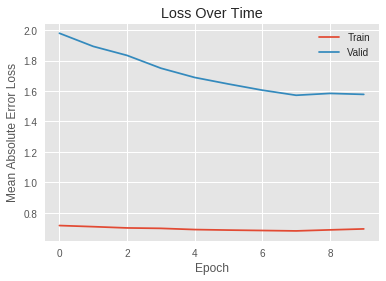

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error Loss')
plt.title('Loss Over Time')
plt.legend(['Train','Valid'])

In [0]:
# from our previous model - mapping encoder sequence to state vectors
encoder_model = Model(encoder_inputs, encoder_states)

# A modified version of the decoding stage that takes in predicted target inputs
# and encoded state vectors, returning predicted target outputs and decoder state vectors.
# We need to hang onto these state vectors to run the next step of the inference loop.
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]

decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model([decoder_inputs] + decoder_states_inputs,
                      [decoder_outputs] + decoder_states)

def decode_sequence(input_seq):
    
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, 1))
    
    # Populate the first target sequence with end of encoding series pageviews
    target_seq[0, 0, 0] = input_seq[0, -1, 0]

    # Sampling loop for a batch of sequences - we will fill decoded_seq with predictions
    # (to simplify, here we assume a batch of size 1).

    decoded_seq = np.zeros((1,pred_steps,1))
    
    for i in range(pred_steps):
        
        output, h, c = decoder_model.predict([target_seq] + states_value)
        
        decoded_seq[0,i,0] = output[0,0,0]

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, 1))
        target_seq[0, 0, 0] = output[0,0,0]

        # Update states
        states_value = [h, c]

    return decoded_seq

In [0]:
encoder_input_data = get_time_block_series(series_array, date_to_index, val_enc_start, val_enc_end)
encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)

decoder_target_data = get_time_block_series(series_array, date_to_index, val_pred_start, val_pred_end)
decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)

In [0]:
def predict_and_plot(encoder_input_data, decoder_target_data, sample_ind, enc_tail_len=50):

    encode_series = encoder_input_data[sample_ind:sample_ind+1,:,:] 
    pred_series = decode_sequence(encode_series)
    
    encode_series = encode_series.reshape(-1,1)
    pred_series = pred_series.reshape(-1,1)   
    target_series = decoder_target_data[sample_ind,:,:1].reshape(-1,1) 
    
    encode_series_tail = np.concatenate([encode_series[-enc_tail_len:],target_series[:1]])
    x_encode = encode_series_tail.shape[0]
    
    plt.figure(figsize=(10,6))   
    
    plt.plot(range(1,x_encode+1),encode_series_tail)
    plt.plot(range(x_encode,x_encode+pred_steps),target_series,color='orange')
    plt.plot(range(x_encode,x_encode+pred_steps),pred_series,color='teal',linestyle='--')
    
    plt.title('Encoder Series Tail of Length %d, Target Series, and Predictions' % enc_tail_len)
    plt.legend(['Encoding Series','Target Series','Predictions'])

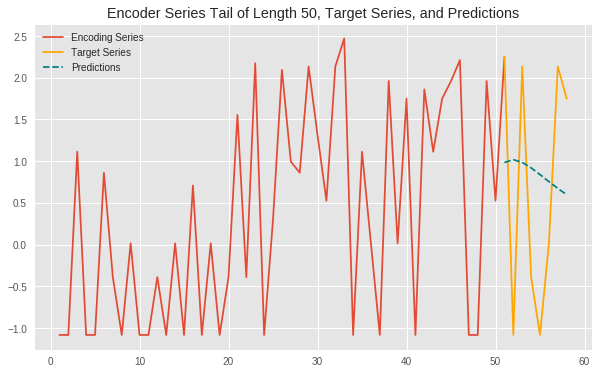

In [70]:
predict_and_plot(encoder_input_data, decoder_target_data,19)

## CONVOLUCIONES 1D CAUSALES DILATADAS - 121 PRODUCTOS 

In [21]:
Final_Data121=Final_Data121.set_index('Fecha')
Final_Data121=Final_Data121.T
Final_Data121.head(5)

Fecha                2016-11-03  2016-11-16  2016-11-17  2016-11-18  \
Nombre_producto                                                       
Acelga                        0           0           0           0   
Agraz                         0           0           0          10   
Aguacate Haas                 0           0           5         113   
Aguacate Papelillo            0           0           0           0   
Ahuyama                       0           0           7           0   

Fecha                2016-11-20  2016-11-21  2016-11-22  2016-11-23  \
Nombre_producto                                                       
Acelga                        0           0           0          10   
Agraz                         0           0           0           2   
Aguacate Haas                 0           0           0           3   
Aguacate Papelillo            0           0           0           3   
Ahuyama                       0           0           4           0   

Fecha                2016-11-24  2016-11-25     ...      2017-09-08  \
Nombre_producto                                 ...                   
Acelga                        0           0     ...               0   
Agraz                         0           0     ...               0   
Aguacate Haas                 0           0     ...               0   
Aguacate Papelillo            0           5     ...               0   
Ahuyama                       0           0     ...               0   

Fecha                2017-09-09  2017-09-11  2017-09-12  2017-09-13  \
Nombre_producto                                                       
Acelga                        0           0           0           0   
Agraz                         0           0           0           0   
Aguacate Haas                 0           0           0           0   
Aguacate Papelillo            3           5           0           3   
Ahuyama                       0           6           0           8   

Fecha                2017-09-14  2017-09-15  2017-09-16  2017-09-17  \
Nombre_producto                                                       
Acelga                        0           0           0           0   
Agraz                         0           0           0           0   
Aguacate Haas                 0          10           0           0   
Aguacate Papelillo            1           0           4           0   
Ahuyama                      16           0           0           0   

Fecha                2017-09-18  
Nombre_producto                  
Acelga                        0  
Agraz                         0  
Aguacate Haas                 0  
Aguacate Papelillo            5  
Ahuyama                      50  

[5 rows x 242 columns]

In [22]:
data_start_date = Final_Data121.columns[1]
data_end_date = Final_Data121.columns[-1]
print('Data ranges from %s to %s' % (data_start_date, data_end_date))

Data ranges from 2016-11-16 00:00:00 to 2017-09-18 00:00:00


In [0]:
from datetime import timedelta

pred_steps = 7
pred_length=timedelta(pred_steps)

first_day = pd.to_datetime(data_start_date) 
last_day = pd.to_datetime(data_end_date)

val_pred_start = last_day - pred_length + timedelta(1)
val_pred_end = last_day

train_pred_start = val_pred_start - pred_length
train_pred_end = val_pred_start - timedelta(days=1)

In [0]:
enc_length = train_pred_start - first_day

train_enc_start = first_day
train_enc_end = train_enc_start + enc_length - timedelta(1)

val_enc_start = train_enc_start + pred_length
val_enc_end = val_enc_start + enc_length - timedelta(1)

In [25]:
print('Train encoding:', train_enc_start, '-', train_enc_end)
print('Train prediction:', train_pred_start, '-', train_pred_end, '\n')
print('Val encoding:', val_enc_start, '-', val_enc_end)
print('Val prediction:', val_pred_start, '-', val_pred_end)

print('\nEncoding interval:', enc_length.days)
print('Prediction interval:', pred_length.days)

Train encoding: 2016-11-16 00:00:00 - 2017-09-04 00:00:00
Train prediction: 2017-09-05 00:00:00 - 2017-09-11 00:00:00 

Val encoding: 2016-11-23 00:00:00 - 2017-09-11 00:00:00
Val prediction: 2017-09-12 00:00:00 - 2017-09-18 00:00:00

Encoding interval: 293
Prediction interval: 7


In [0]:
df=Final_Data121
date_to_index = pd.Series(index=pd.Index([pd.to_datetime(c) for c in df.columns[1:]]),
                          data=[i for i in range(len(df.columns[1:]))])

series_array = df[df.columns[1:]].values

def get_time_block_series(series_array, date_to_index, start_date, end_date):
    
    inds = date_to_index[start_date:end_date]
    return series_array[:,inds]

def transform_series_encode(series_array):
    
    series_array = np.log1p(np.nan_to_num(series_array)) # filling NaN with 0
    series_mean = series_array.mean(axis=1).reshape(-1,1) 
    series_array = series_array - series_mean
    series_array = series_array.reshape((series_array.shape[0],series_array.shape[1], 1))
    
    return series_array, series_mean

def transform_series_decode(series_array, encode_series_mean):
    
    series_array = np.log1p(np.nan_to_num(series_array)) # filling NaN with 0
    series_array = series_array - encode_series_mean
    series_array = series_array.reshape((series_array.shape[0],series_array.shape[1], 1))
    
    return series_array

In [0]:
from keras.models import Model
from keras.layers import Input, Conv1D, Dense, Dropout, Lambda, concatenate
from keras.optimizers import Adam
from keras.layers import Activation, Dense

# convolutional layer parameters
n_filters = 32 
filter_width = 2
dilation_rates = [2**i for i in range(9)] 

# define an input history series and pass it through a stack of dilated causal convolutions. 
history_seq = Input(shape=(None, 1))
x = history_seq

for dilation_rate in dilation_rates:
    x = Conv1D(filters=n_filters,
               kernel_size=filter_width, 
               padding='causal',
               dilation_rate=dilation_rate)(x)

x = Dense(512, activation='relu')(x)
x = Dropout(.2)(x)
x = Dense(1,activation='linear')(x)

# extract the last 7 time steps as the training target
def slice(x, seq_length):
    return x[:,-seq_length:,:]

pred_seq_train = Lambda(slice, arguments={'seq_length':6})(x)

model = Model(history_seq, pred_seq_train)

In [78]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, None, 1)           0         
_________________________________________________________________
conv1d_38 (Conv1D)           (None, None, 32)          96        
_________________________________________________________________
conv1d_39 (Conv1D)           (None, None, 32)          2080      
_________________________________________________________________
conv1d_40 (Conv1D)           (None, None, 32)          2080      
_________________________________________________________________
conv1d_41 (Conv1D)           (None, None, 32)          2080      
_________________________________________________________________
conv1d_42 (Conv1D)           (None, None, 32)          2080      
_________________________________________________________________
conv1d_43 (Conv1D)           (None, None, 32)          2080      
__________

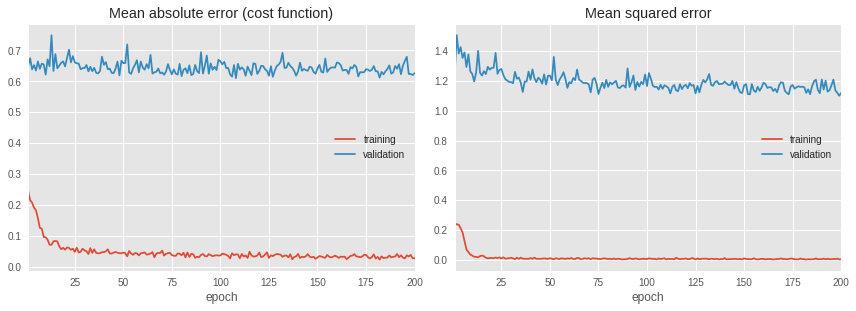

In [79]:
from keras.optimizers import adam
from keras.optimizers import SGD
from keras.optimizers import adamax
from keras.optimizers import adadelta
from keras.optimizers import RMSprop,nadam
from livelossplot import PlotLossesKeras

first_n_samples = 27
batch_size = 3
epochs = 200

# sample of series from train_enc_start to train_enc_end  
encoder_input_data = get_time_block_series(series_array, date_to_index, 
                                           train_enc_start, train_enc_end)[:first_n_samples]
encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)

# sample of series from train_pred_start to train_pred_end 
decoder_target_data = get_time_block_series(series_array, date_to_index, 
                                            train_pred_start, train_pred_end)[:first_n_samples]
decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)

# we append a lagged history of the target series to the input data, 
# so that we can train with teacher forcing
lagged_target_history = decoder_target_data[:,:-1,:1]
encoder_input_data = np.concatenate([encoder_input_data, lagged_target_history], axis=1)

model.compile(nadam(lr=0.001), loss='mean_absolute_error',metrics=['mse'])
history = model.fit(encoder_input_data, decoder_target_data,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2,callbacks=([PlotLossesKeras()]))

In [0]:
def predict_sequence(input_sequence):

    history_sequence = input_sequence.copy()
    pred_sequence = np.zeros((1,pred_steps,1)) # initialize output (pred_steps time steps)  
    
    for i in range(pred_steps):
        
        # record next time step prediction (last time step of model output) 
        last_step_pred = model.predict(history_sequence)[0,-1,0]
        pred_sequence[0,i,0] = last_step_pred
        
        # add the next time step prediction to the history sequence
        history_sequence = np.concatenate([history_sequence, 
                                           last_step_pred.reshape(-1,1,1)], axis=1)

    return pred_sequence

In [0]:
encoder_input_data = get_time_block_series(series_array, date_to_index, val_enc_start, val_enc_end)
encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)

decoder_target_data = get_time_block_series(series_array, date_to_index, val_pred_start, val_pred_end)
decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)

In [0]:
def predict_and_plot(encoder_input_data, decoder_target_data, sample_ind, enc_tail_len=400):

    encode_series = encoder_input_data[sample_ind:sample_ind+1,:,:] 
    pred_series = predict_sequence(encode_series)
    
    encode_series = encode_series.reshape(-1,1)
    pred_series = pred_series.reshape(-1,1)   
    target_series = decoder_target_data[sample_ind,:,:1].reshape(-1,1) 
    
    pred_series= pred_series+encode_series_mean[sample_ind]
    pred_series= np.expm1(pred_series)
    pred_series[pred_series<0] = 0
    
    target_series= target_series+encode_series_mean[sample_ind] 
    target_series= np.expm1( target_series)
    target_series[target_series<0] = 0
    
    
    encode_series_tail = np.concatenate([encode_series[-enc_tail_len:],target_series[:1]])
    x_encode = encode_series_tail.shape[0]
    
    encode_series_tail= encode_series_tail+encode_series_mean[sample_ind]
    encode_series_tail= np.expm1(encode_series_tail)
    encode_series_tail[encode_series_tail<0] = 0
    
    plt.figure(figsize=(22,9))
    
    plt.plot(range(1,x_encode+1),encode_series_tail)
    plt.plot(range(x_encode,x_encode+pred_steps),target_series,color='orange')
    plt.plot(range(x_encode,x_encode+pred_steps),pred_series,color='black',linestyle='--')
    
    plt.title('Encoder Series Tail of Length %d, Target Series, and Predictions' % enc_tail_len)
    plt.legend(['Encoding Series','Target Series','Predictions'])

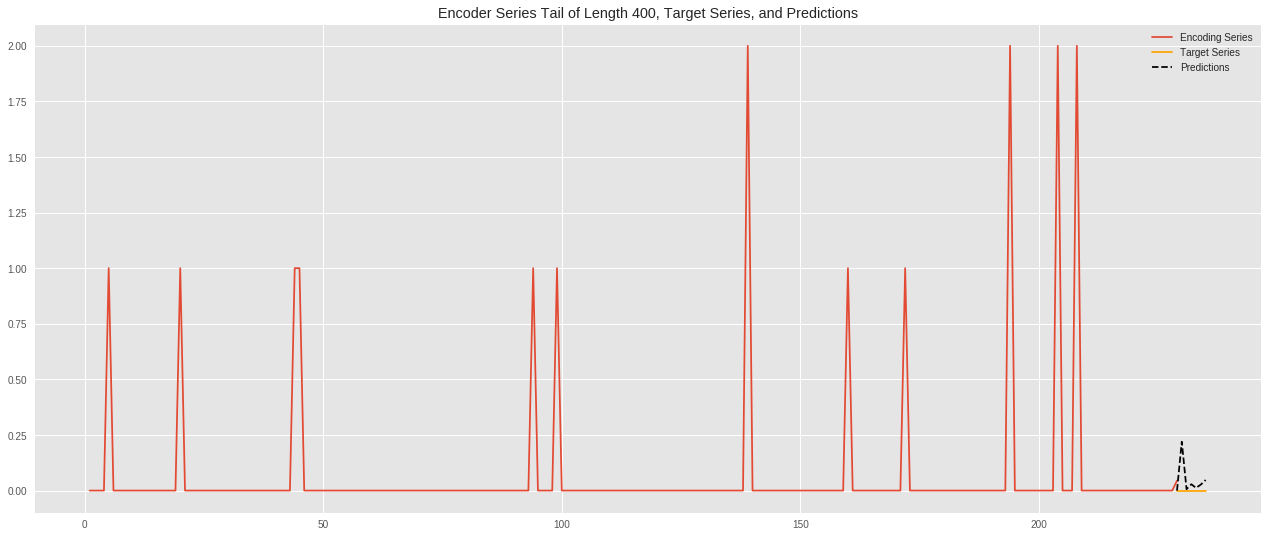

In [105]:
predict_and_plot(encoder_input_data, decoder_target_data,23)

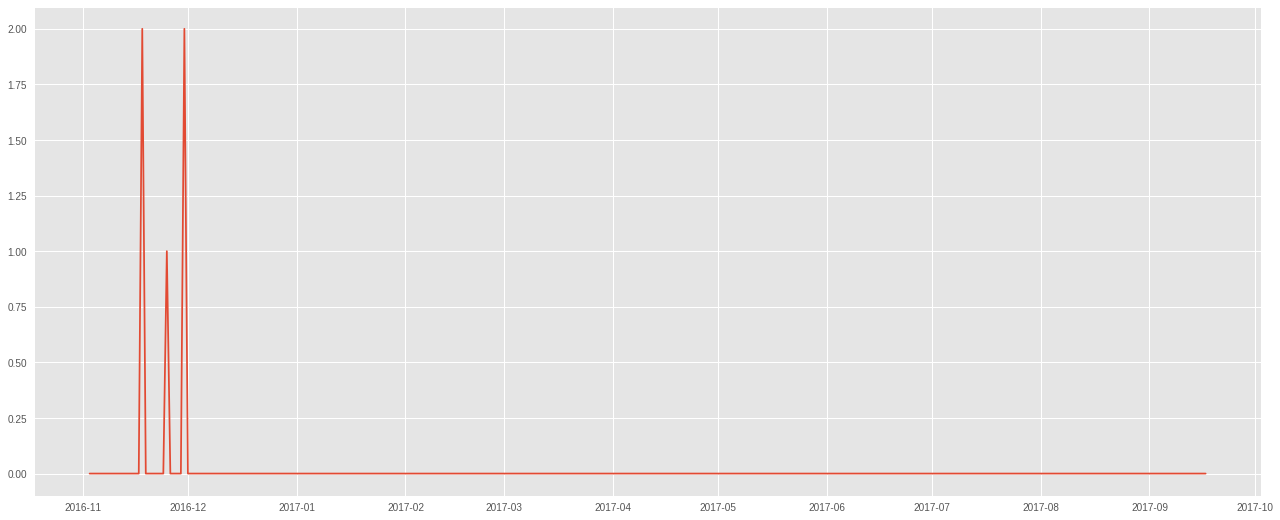

In [157]:
plt.figure(figsize=(22,9))
plt.plot(Final_Data121["Fecha"],Final_Data121.iloc[:,93:94]) 

## CONVOLUCIONES 1D CAUSALES DILATADAS - 27  PRODUCTOS 

In [115]:
dataFinal= pd.read_excel("Final Dataset.xlsx", index_col="Fecha")
dataFinal

Aguacate Haas   Aguacate Papelillo   Banano Criollo   Berenjena   \
Fecha                                                                          
2016-11-17             5.0                  NaN              NaN         NaN   
2016-11-18           113.0                  NaN              5.0         NaN   
2016-11-20             NaN                  NaN              NaN         4.0   
2016-11-21             NaN                  NaN              2.0         5.0   
2016-11-22             NaN                  NaN              2.0        22.0   
2016-11-23             3.0                  3.0             38.0         NaN   
2016-11-24             NaN                  NaN              NaN        11.0   
2016-11-25             NaN                  5.0              9.0         NaN   
2016-11-26             2.0                  NaN              NaN         NaN   
2016-11-27             NaN                  3.0              2.0         7.0   
2016-11-28             NaN                  NaN              NaN         5.0   
2016-11-29             NaN                 12.0              NaN         1.0   
2016-11-30             NaN                  1.0              2.0        15.0   
2016-12-01             NaN                  NaN              NaN         2.0   
2016-12-02             NaN                  5.0              8.0         8.0   
2016-12-04             NaN                  NaN              2.0         6.0   
2016-12-05            11.0                  NaN              NaN         3.0   
2016-12-06             NaN                  1.0              3.0         3.0   
2016-12-07             NaN                  NaN              NaN        10.0   
2016-12-08             NaN                  NaN              NaN         NaN   
2016-12-09             NaN                  5.0              NaN         5.0   
2016-12-11             NaN                  NaN              NaN         8.0   
2016-12-12             NaN                  NaN              NaN         8.0   
2016-12-13             2.0                  NaN              NaN         NaN   
2016-12-14             NaN                  3.0              2.0         9.0   
2016-12-15             NaN                  NaN              NaN         NaN   
2016-12-16             NaN                  NaN              NaN         8.0   
2016-12-18             NaN                  NaN              NaN         7.0   
2016-12-19             NaN                  NaN              NaN        12.0   
2016-12-20             NaN                  NaN              NaN         7.0   
...                    ...                  ...              ...         ...   
2017-08-16             NaN                  3.0              4.0         9.0   
2017-08-17             NaN                  4.0             16.0         NaN   
2017-08-19             4.0                  NaN              6.0         NaN   
2017-08-21             NaN                  NaN              8.0         4.0   
2017-08-22             NaN                  3.0              3.0         9.0   
2017-08-23             NaN                  3.0              3.0         NaN   
2017-08-24             NaN                  NaN             16.0         1.0   
2017-08-25             NaN                  3.0              NaN         4.0   
2017-08-26             NaN                  NaN              6.0         NaN   
2017-08-27             NaN                  NaN              NaN         4.0   
2017-08-28           100.0                  4.0              NaN         4.0   
2017-08-29             NaN                  NaN              NaN         NaN   
2017-08-30             NaN                  1.0              4.0         4.0   
2017-08-31             NaN                  4.0             12.0         4.0   
2017-09-02             NaN                  3.0              NaN         NaN   
2017-09-03             NaN                  NaN              NaN         2.0   
2017-09-04             NaN                  5.0              4.0         6.0   
2017-09-05  

In [116]:
new_cols=['Aguacate Haas ', 'Aguacate Papelillo ', 'Banano Criollo ',
       'Berenjena ', 'Breva ', 'Brócoli ', 'Cebolla Cabezona Blanca ',
       'Cebolla Cabezona Roja ', 'Champiñón ', 'Fresa Pareja ',
       'Lechuga Crespa ', 'Limón Tahití ', 'Mango Tommy Atkins ',
       'Mazorca Desgranada ', 'Mora Castilla ', 'Papa Criolla ',
       'Pepino Cohombro ', 'Perejil Crespo ', 'Perejil Liso ',
       'Pimentón Rojo ', 'Piña Golden Sweet ', 'Plátano Maduro ', 'Rúgula ',
       'Tomate Chonto ', 'Tomate Larga Vida ', 'Zanahoria ',
       'Zucchini Verde ']
dataFinal.rename(columns=dict(zip(dataFinal.columns[0:], new_cols)),inplace=True)
dataFinal.head()

Aguacate Haas   Aguacate Papelillo   Banano Criollo   Berenjena   \
Fecha                                                                          
2016-11-17             5.0                  NaN              NaN         NaN   
2016-11-18           113.0                  NaN              5.0         NaN   
2016-11-20             NaN                  NaN              NaN         4.0   
2016-11-21             NaN                  NaN              2.0         5.0   
2016-11-22             NaN                  NaN              2.0        22.0   

            Breva   Brócoli   Cebolla Cabezona Blanca   \
Fecha                                                    
2016-11-17     NaN       NaN                       NaN   
2016-11-18     NaN       NaN                       NaN   
2016-11-20     NaN       NaN                       NaN   
2016-11-21     NaN       NaN                       2.0   
2016-11-22     NaN       1.0                       NaN   

            Cebolla Cabezona Roja   Champiñón   Fresa Pareja   \
Fecha                                                           
2016-11-17                     NaN         NaN            NaN   
2016-11-18                     NaN         NaN           30.0   
2016-11-20                     5.0         2.0            3.0   
2016-11-21                     1.0         1.0            NaN   
2016-11-22                     7.0         1.0            NaN   

                 ...         Perejil Crespo   Perejil Liso   Pimentón Rojo   \
Fecha            ...                                                          
2016-11-17       ...                     NaN            NaN             NaN   
2016-11-18       ...                     NaN            NaN             NaN   
2016-11-20       ...                     1.0            1.0             5.0   
2016-11-21       ...                     NaN            2.0             9.0   
2016-11-22       ...                     NaN            NaN             7.0   

            Piña Golden Sweet   Plátano Maduro   Rúgula   Tomate Chonto   \
Fecha                                                                      
2016-11-17                 NaN              NaN      NaN             NaN   
2016-11-18                 NaN              NaN      5.0             NaN   
2016-11-20                 1.0              NaN      NaN            10.0   
2016-11-21                 NaN              NaN      NaN             8.0   
2016-11-22                 NaN              NaN      NaN            43.0   

            Tomate Larga Vida   Zanahoria   Zucchini Verde   
Fecha                                                        
2016-11-17                 NaN         NaN              NaN  
2016-11-18                 NaN         NaN              NaN  
2016-11-20                 NaN         2.0              5.0  
2016-11-21                 NaN         2.0              5.0  
2016-11-22                 NaN         3.0              7.0  

[5 rows x 27 columns]

In [117]:
dataFinal=dataFinal.fillna(0)
dataFinal.head()

Aguacate Haas   Aguacate Papelillo   Banano Criollo   Berenjena   \
Fecha                                                                          
2016-11-17             5.0                  0.0              0.0         0.0   
2016-11-18           113.0                  0.0              5.0         0.0   
2016-11-20             0.0                  0.0              0.0         4.0   
2016-11-21             0.0                  0.0              2.0         5.0   
2016-11-22             0.0                  0.0              2.0        22.0   

            Breva   Brócoli   Cebolla Cabezona Blanca   \
Fecha                                                    
2016-11-17     0.0       0.0                       0.0   
2016-11-18     0.0       0.0                       0.0   
2016-11-20     0.0       0.0                       0.0   
2016-11-21     0.0       0.0                       2.0   
2016-11-22     0.0       1.0                       0.0   

            Cebolla Cabezona Roja   Champiñón   Fresa Pareja   \
Fecha                                                           
2016-11-17                     0.0         0.0            0.0   
2016-11-18                     0.0         0.0           30.0   
2016-11-20                     5.0         2.0            3.0   
2016-11-21                     1.0         1.0            0.0   
2016-11-22                     7.0         1.0            0.0   

                 ...         Perejil Crespo   Perejil Liso   Pimentón Rojo   \
Fecha            ...                                                          
2016-11-17       ...                     0.0            0.0             0.0   
2016-11-18       ...                     0.0            0.0             0.0   
2016-11-20       ...                     1.0            1.0             5.0   
2016-11-21       ...                     0.0            2.0             9.0   
2016-11-22       ...                     0.0            0.0             7.0   

            Piña Golden Sweet   Plátano Maduro   Rúgula   Tomate Chonto   \
Fecha                                                                      
2016-11-17                 0.0              0.0      0.0             0.0   
2016-11-18                 0.0              0.0      5.0             0.0   
2016-11-20                 1.0              0.0      0.0            10.0   
2016-11-21                 0.0              0.0      0.0             8.0   
2016-11-22                 0.0              0.0      0.0            43.0   

            Tomate Larga Vida   Zanahoria   Zucchini Verde   
Fecha                                                        
2016-11-17                 0.0         0.0              0.0  
2016-11-18                 0.0         0.0              0.0  
2016-11-20                 0.0         2.0              5.0  
2016-11-21                 0.0         2.0              5.0  
2016-11-22                 0.0         3.0              7.0  

[5 rows x 27 columns]

In [118]:
dataFinal2=dataFinal.T
dataFinal2.head()

Fecha                2016-11-17  2016-11-18  2016-11-20  2016-11-21  \
Aguacate Haas               5.0       113.0         0.0         0.0   
Aguacate Papelillo          0.0         0.0         0.0         0.0   
Banano Criollo              0.0         5.0         0.0         2.0   
Berenjena                   0.0         0.0         4.0         5.0   
Breva                       0.0         0.0         0.0         0.0   

Fecha                2016-11-22  2016-11-23  2016-11-24  2016-11-25  \
Aguacate Haas               0.0         3.0         0.0         0.0   
Aguacate Papelillo          0.0         3.0         0.0         5.0   
Banano Criollo              2.0        38.0         0.0         9.0   
Berenjena                  22.0         0.0        11.0         0.0   
Breva                       0.0         0.0         0.0         0.0   

Fecha                2016-11-26  2016-11-27     ...      2017-09-08  \
Aguacate Haas               2.0         0.0     ...             0.0   
Aguacate Papelillo          0.0         3.0     ...             0.0   
Banano Criollo              0.0         2.0     ...             0.0   
Berenjena                   0.0         7.0     ...             0.0   
Breva                       0.0         0.0     ...             0.0   

Fecha                2017-09-09  2017-09-11  2017-09-12  2017-09-13  \
Aguacate Haas               0.0         0.0         0.0         0.0   
Aguacate Papelillo          3.0         5.0         0.0         3.0   
Banano Criollo              0.0        11.0         6.0         3.0   
Berenjena                   7.0         5.0         0.0         6.0   
Breva                       0.0         0.0         0.0         0.0   

Fecha                2017-09-14  2017-09-15  2017-09-16  2017-09-17  \
Aguacate Haas               0.0        10.0         0.0         0.0   
Aguacate Papelillo          1.0         0.0         4.0         0.0   
Banano Criollo              2.0         0.0         4.0         0.0   
Berenjena                   0.0         0.0         3.0         0.0   
Breva                       0.0         0.0         0.0         0.0   

Fecha                2017-09-18  
Aguacate Haas               0.0  
Aguacate Papelillo          5.0  
Banano Criollo             19.0  
Berenjena                   5.0  
Breva                       0.0  

[5 rows x 240 columns]

In [119]:
dataFinal3=dataFinal2.reset_index()
dataFinal3.head()

Fecha                index  2016-11-17 00:00:00  2016-11-18 00:00:00  \
0           Aguacate Haas                   5.0                113.0   
1      Aguacate Papelillo                   0.0                  0.0   
2          Banano Criollo                   0.0                  5.0   
3               Berenjena                   0.0                  0.0   
4                   Breva                   0.0                  0.0   

Fecha  2016-11-20 00:00:00  2016-11-21 00:00:00  2016-11-22 00:00:00  \
0                      0.0                  0.0                  0.0   
1                      0.0                  0.0                  0.0   
2                      0.0                  2.0                  2.0   
3                      4.0                  5.0                 22.0   
4                      0.0                  0.0                  0.0   

Fecha  2016-11-23 00:00:00  2016-11-24 00:00:00  2016-11-25 00:00:00  \
0                      3.0                  0.0                  0.0   
1                      3.0                  0.0                  5.0   
2                     38.0                  0.0                  9.0   
3                      0.0                 11.0                  0.0   
4                      0.0                  0.0                  0.0   

Fecha  2016-11-26 00:00:00         ...           2017-09-08 00:00:00  \
0                      2.0         ...                           0.0   
1                      0.0         ...                           0.0   
2                      0.0         ...                           0.0   
3                      0.0         ...                           0.0   
4                      0.0         ...                           0.0   

Fecha  2017-09-09 00:00:00  2017-09-11 00:00:00  2017-09-12 00:00:00  \
0                      0.0                  0.0                  0.0   
1                      3.0                  5.0                  0.0   
2                      0.0                 11.0                  6.0   
3                      7.0                  5.0                  0.0   
4                      0.0                  0.0                  0.0   

Fecha  2017-09-13 00:00:00  2017-09-14 00:00:00  2017-09-15 00:00:00  \
0                      0.0                  0.0                 10.0   
1                      3.0                  1.0                  0.0   
2                      3.0                  2.0                  0.0   
3                      6.0                  0.0                  0.0   
4                      0.0                  0.0                  0.0   

Fecha  2017-09-16 00:00:00  2017-09-17 00:00:00  2017-09-18 00:00:00  
0                      0.0                  0.0                  0.0  
1                      4.0                  0.0                  5.0  
2                      4.0                  0.0                 19.0  
3                      3.0                  0.0                  5.0  
4                      0.0                  0.0                  0.0  

[5 rows x 241 columns]

In [120]:
data_start_date = dataFinal3.columns[1]
data_end_date = dataFinal3.columns[-1]
print('Data ranges from %s to %s' % (data_start_date, data_end_date))

Data ranges from 2016-11-17 00:00:00 to 2017-09-18 00:00:00


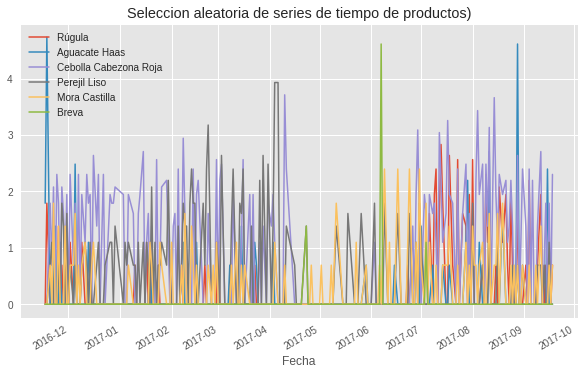

In [121]:
def plot_random_series(df, n_series):
    
    sample = df.sample(n_series, random_state=8)
    page_labels = sample['index'].tolist()
    series_samples = sample.loc[:,data_start_date:data_end_date]
    
    plt.figure(figsize=(10,6))
    
    for i in range(series_samples.shape[0]):
        np.log1p(pd.Series(series_samples.iloc[i]).astype(np.float64)).plot(linewidth=1.5)
    
    plt.title('Seleccion aleatoria de series de tiempo de productos)')
    plt.legend(page_labels)
    
plot_random_series(dataFinal3, 6)

In [0]:
from datetime import timedelta

pred_steps = 8
pred_length=timedelta(pred_steps)

first_day = pd.to_datetime(data_start_date) 
last_day = pd.to_datetime(data_end_date)

val_pred_start = last_day - pred_length + timedelta(1)
val_pred_end = last_day

train_pred_start = val_pred_start - pred_length
train_pred_end = val_pred_start - timedelta(days=1)

In [0]:
enc_length = train_pred_start - first_day

train_enc_start = first_day
train_enc_end = train_enc_start + enc_length - timedelta(1)

val_enc_start = train_enc_start + pred_length
val_enc_end = val_enc_start + enc_length - timedelta(1)

In [124]:
print('Train encoding:', train_enc_start, '-', train_enc_end)
print('Train prediction:', train_pred_start, '-', train_pred_end, '\n')
print('Val encoding:', val_enc_start, '-', val_enc_end)
print('Val prediction:', val_pred_start, '-', val_pred_end)

print('\nEncoding interval:', enc_length.days)
print('Prediction interval:', pred_length.days)

Train encoding: 2016-11-17 00:00:00 - 2017-09-02 00:00:00
Train prediction: 2017-09-03 00:00:00 - 2017-09-10 00:00:00 

Val encoding: 2016-11-25 00:00:00 - 2017-09-10 00:00:00
Val prediction: 2017-09-11 00:00:00 - 2017-09-18 00:00:00

Encoding interval: 290
Prediction interval: 8


In [0]:
df=dataFinal3

date_to_index = pd.Series(index=pd.Index([pd.to_datetime(c) for c in df.columns[1:]]),
                          data=[i for i in range(len(df.columns[1:]))])

series_array = df[df.columns[1:]].values

def get_time_block_series(series_array, date_to_index, start_date, end_date):
    
    inds = date_to_index[start_date:end_date]
    return series_array[:,inds]

def transform_series_encode(series_array):
    
    series_array = np.log1p(np.nan_to_num(series_array)) # filling NaN with 0
    series_mean = series_array.mean(axis=1).reshape(-1,1) 
    series_array = series_array - series_mean
    series_array = series_array.reshape((series_array.shape[0],series_array.shape[1], 1))
    
    return series_array, series_mean

def transform_series_decode(series_array, encode_series_mean):
    
    series_array = np.log1p(np.nan_to_num(series_array)) # filling NaN with 0
    series_array = series_array - encode_series_mean
    series_array = series_array.reshape((series_array.shape[0],series_array.shape[1], 1))
    
    return series_array

In [0]:
from keras.models import Model
from keras.layers import Input, Conv1D, Dense, Dropout, Lambda, concatenate
from keras.optimizers import Adam
from keras.layers import Activation, Dense

# convolutional layer parameters
n_filters = 32 
filter_width = 2
dilation_rates = [2**i for i in range(9)] 

# define an input history series and pass it through a stack of dilated causal convolutions. 
history_seq = Input(shape=(None, 1))
x = history_seq

for dilation_rate in dilation_rates:
    x = Conv1D(filters=n_filters,
               kernel_size=filter_width, 
               padding='causal',
               dilation_rate=dilation_rate)(x)

x = Dense(32, activation='relu')(x)
x = Dropout(.5)(x)
x = Dense(1,activation='linear')(x)

# extract the last 7 time steps as the training target
def slice(x, seq_length):
    return x[:,-seq_length:,:]

pred_seq_train = Lambda(slice, arguments={'seq_length':7})(x)

model = Model(history_seq, pred_seq_train)

In [131]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, None, 1)           0         
_________________________________________________________________
conv1d_56 (Conv1D)           (None, None, 32)          96        
_________________________________________________________________
conv1d_57 (Conv1D)           (None, None, 32)          2080      
_________________________________________________________________
conv1d_58 (Conv1D)           (None, None, 32)          2080      
_________________________________________________________________
conv1d_59 (Conv1D)           (None, None, 32)          2080      
_________________________________________________________________
conv1d_60 (Conv1D)           (None, None, 32)          2080      
_________________________________________________________________
conv1d_61 (Conv1D)           (None, None, 32)          2080      
__________

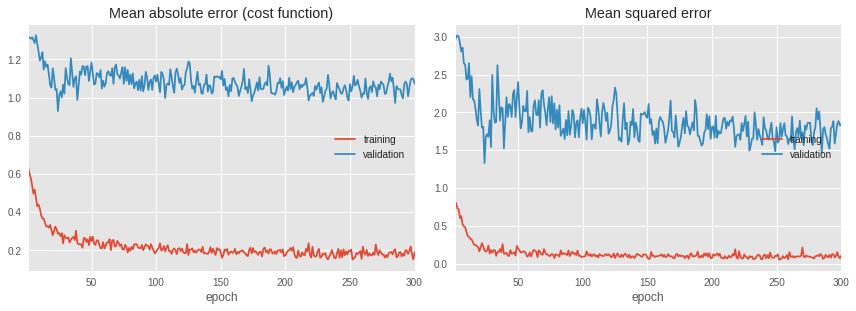

In [132]:
from keras.optimizers import adam
from keras.optimizers import SGD
from keras.optimizers import adamax
from keras.optimizers import adadelta
from keras.optimizers import RMSprop,nadam
from livelossplot import PlotLossesKeras

first_n_samples = 27
batch_size = 3
epochs = 300

# sample of series from train_enc_start to train_enc_end  
encoder_input_data = get_time_block_series(series_array, date_to_index, 
                                           train_enc_start, train_enc_end)[:first_n_samples]
encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)

# sample of series from train_pred_start to train_pred_end 
decoder_target_data = get_time_block_series(series_array, date_to_index, 
                                            train_pred_start, train_pred_end)[:first_n_samples]
decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)

# we append a lagged history of the target series to the input data, 
# so that we can train with teacher forcing
lagged_target_history = decoder_target_data[:,:-1,:1]
encoder_input_data = np.concatenate([encoder_input_data, lagged_target_history], axis=1)

model.compile(nadam(lr=0.001), loss='mean_absolute_error',metrics=['mse'])
history = model.fit(encoder_input_data, decoder_target_data,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2,callbacks=([PlotLossesKeras()]))

In [0]:
def predict_sequence(input_sequence):

    history_sequence = input_sequence.copy()
    pred_sequence = np.zeros((1,pred_steps,1)) # initialize output (pred_steps time steps)  
    
    for i in range(pred_steps):
        
        # record next time step prediction (last time step of model output) 
        last_step_pred = model.predict(history_sequence)[0,-1,0]
        pred_sequence[0,i,0] = last_step_pred
        
        # add the next time step prediction to the history sequence
        history_sequence = np.concatenate([history_sequence, 
                                           last_step_pred.reshape(-1,1,1)], axis=1)

    return pred_sequence

In [0]:
encoder_input_data = get_time_block_series(series_array, date_to_index, val_enc_start, val_enc_end)
encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)

decoder_target_data = get_time_block_series(series_array, date_to_index, val_pred_start, val_pred_end)
decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)

In [0]:
def predict_and_plot(encoder_input_data, decoder_target_data, sample_ind, enc_tail_len=290):

    encode_series = encoder_input_data[sample_ind:sample_ind+1,:,:] 
    pred_series = predict_sequence(encode_series)
    
    encode_series = encode_series.reshape(-1,1)
    pred_series = pred_series.reshape(-1,1)   
    target_series = decoder_target_data[sample_ind,:,:1].reshape(-1,1) 
    
    pred_series= pred_series+encode_series_mean[sample_ind]
    pred_series= np.expm1(pred_series)
    pred_series[pred_series<0] = 0
    
    target_series= target_series+encode_series_mean[sample_ind] 
    target_series= np.expm1( target_series)
    target_series[target_series<0] = 0
    
    
    encode_series_tail = np.concatenate([encode_series[-enc_tail_len:],target_series[:1]])
    x_encode = encode_series_tail.shape[0]
    
    encode_series_tail= encode_series_tail+encode_series_mean[sample_ind]
    encode_series_tail= np.expm1(encode_series_tail)
    encode_series_tail[encode_series_tail<0] = 0
    
    plt.figure(figsize=(22,9))
    
    plt.plot(range(1,x_encode+1),encode_series_tail)
    plt.plot(range(x_encode,x_encode+pred_steps),target_series,color='orange')
    plt.plot(range(x_encode,x_encode+pred_steps),pred_series,color='black',linestyle='--')
    
    plt.title('Encoder Series Tail of Length %d, Target Series, and Predictions' % enc_tail_len)
    plt.legend(['Encoding Series','Target Series','Predictions'])

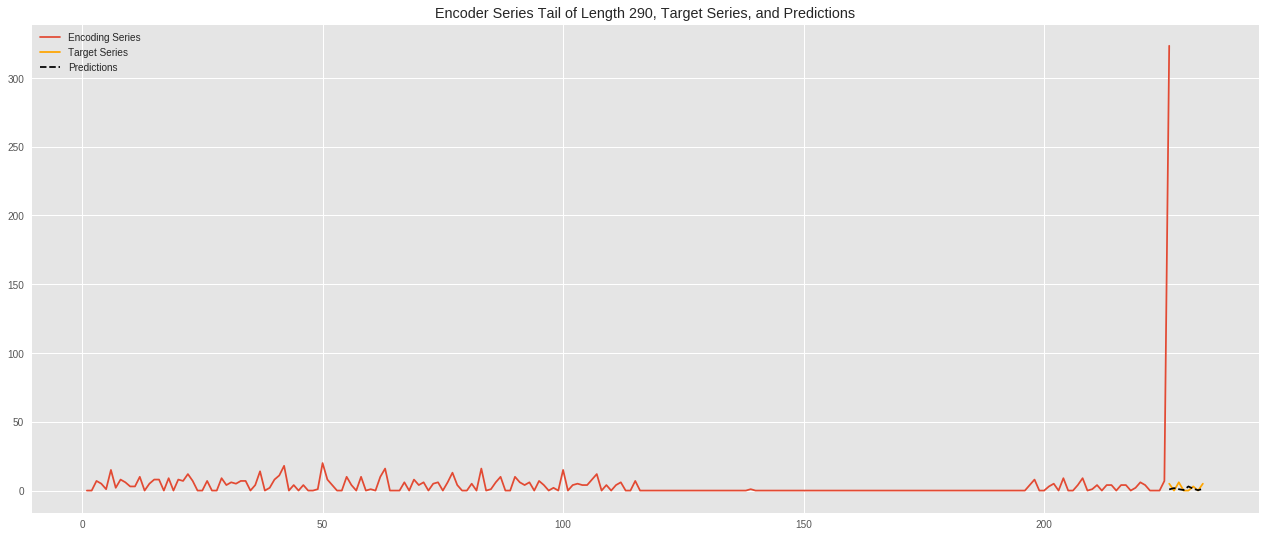

In [139]:
predict_and_plot(encoder_input_data, decoder_target_data,3)

In [0]:
plt.figure(figsize=(22,9))
plt.plot(dataFinal.iloc[:,12:13]) 